In [ ]:
pip install scikit-learn
pip install pandas
pip install numpy

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **SUPERVISED LEARNING (LOGISTIC REGRESSION)**

### **Load dataset**

In [2]:
# add file name and load the dataset using pandas
file_path = r'D:\ML5\ASSIGNMENT\portofolio\artifacts\advertising.csv'
df = pd.read_csv(file_path)

# display the first few rows of the dataset
df.head()


,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Hour,DayOfWeek,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0,0,6,0
1,80.23,31,68441.85,193.77,1,1,0,0
2,69.47,26,59785.94,236.50,0,20,6,0
3,74.15,29,54806.18,245.89,1,2,6,0
4,68.37,35,73889.99,225.58,0,3,4,0


## **EXPLORATORY DATA ANALYSIS**

### **Inspect dataset**

In [3]:
# Summary statistics
df.describe()


,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Hour,DayOfWeek,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,11.660000,3.064000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,6.960952,1.998474,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,6.000000,1.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,12.000000,3.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,18.000000,5.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,23.000000,6.000000,1.00000


### **Distribution Analysis**

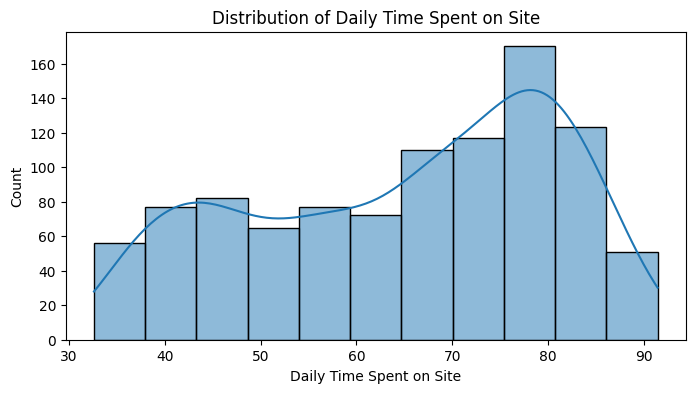

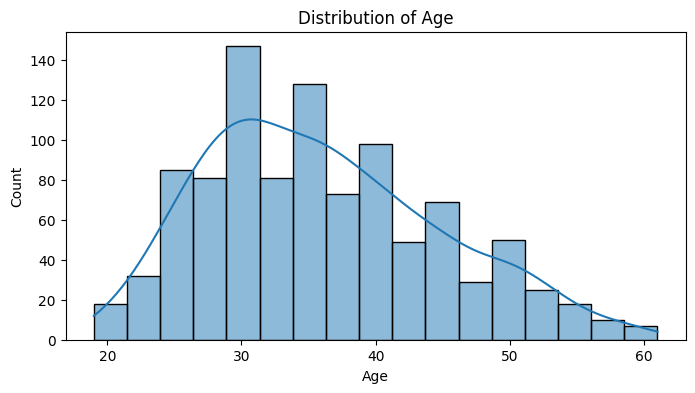

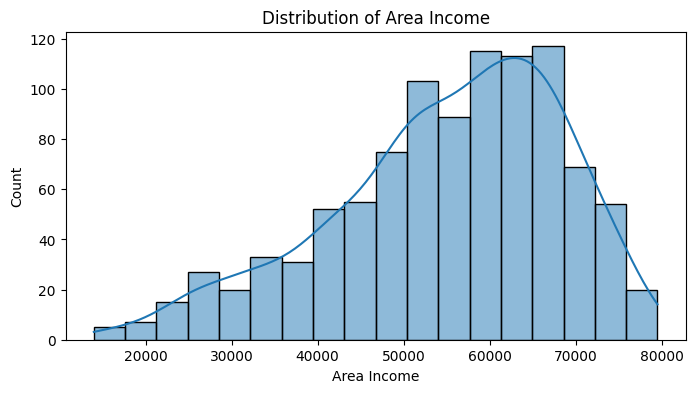

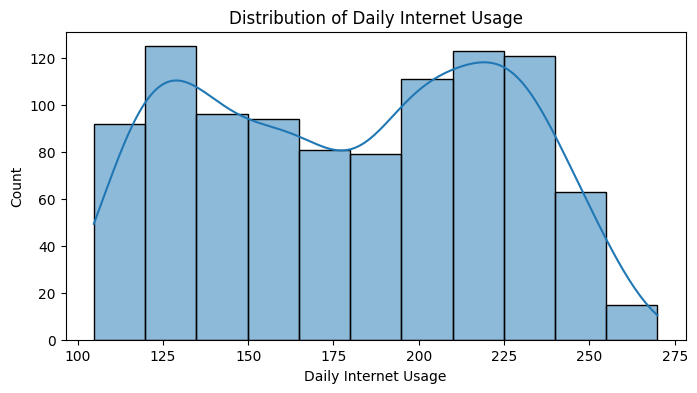

In [ ]:
# Numerical features distribution
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### **Categorical Analysis**

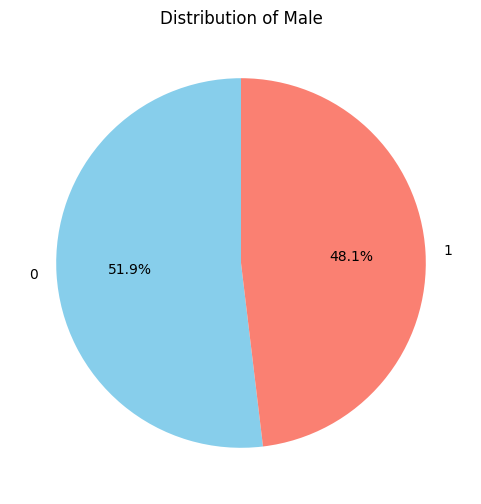

In [ ]:
# Pie chart for 'Male' column
plt.figure(figsize=(6, 6))
df['Male'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Male')
plt.ylabel('')
plt.show()


Dilihat dari distribusi data, lebih banyak user male

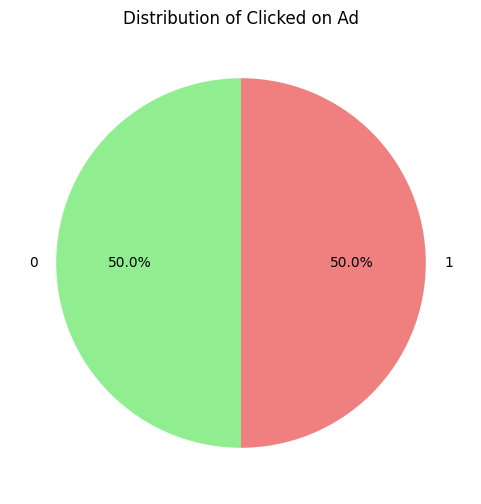

In [ ]:

# Pie chart for 'Clicked on Ad' column
plt.figure(figsize=(6, 6))
df['Clicked on Ad'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Clicked on Ad')
plt.ylabel('')
plt.show()

Sebaran data yang mengklik ads sudah seimbang

Correlation Analysis

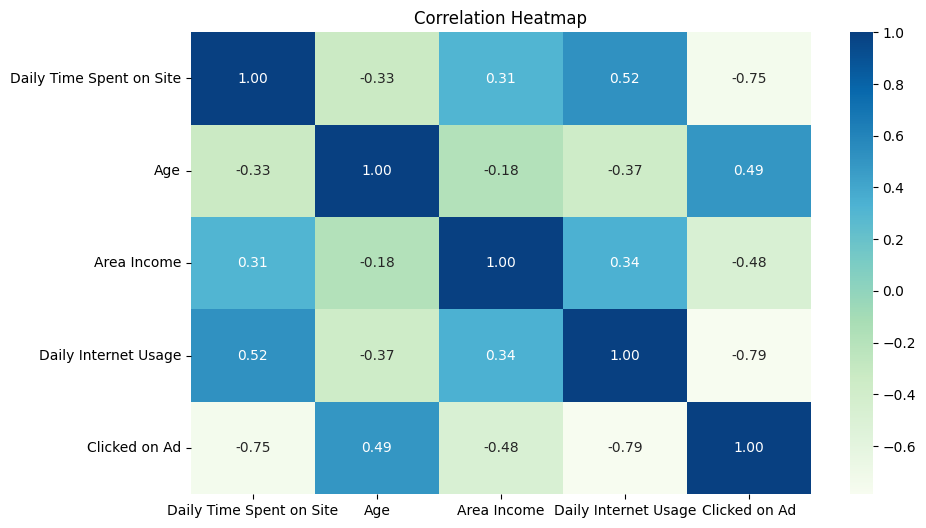

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols + ['Clicked on Ad']].corr(), annot=True, cmap='GnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan graphic correlation, daily internet usage memiliki korelasi negatif yang tinggi terhadap clicked on ad, kemuadian tertinggi kedua ada di dailiy time spent on site.
Daily Time Spent on Site memiliki korelasi negatif yang cukup kuat dengan Clicked on Ad (-0.75). Ini menunjukkan bahwa semakin lama seseorang menghabiskan waktu di situs setiap harinya, semakin kecil kemungkinan mereka mengklik iklan.
Daily Internet Usage juga memiliki korelasi negatif kuat dengan Clicked on Ad (-0.79), artinya semakin tinggi penggunaan internet harian, semakin rendah kemungkinan pengguna mengklik iklan.
Age memiliki korelasi positif dengan Clicked on Ad (0.49), yang berarti semakin tua usia pengguna, semakin besar kemungkinan mereka mengklik iklan.

Feature-Target Relationship

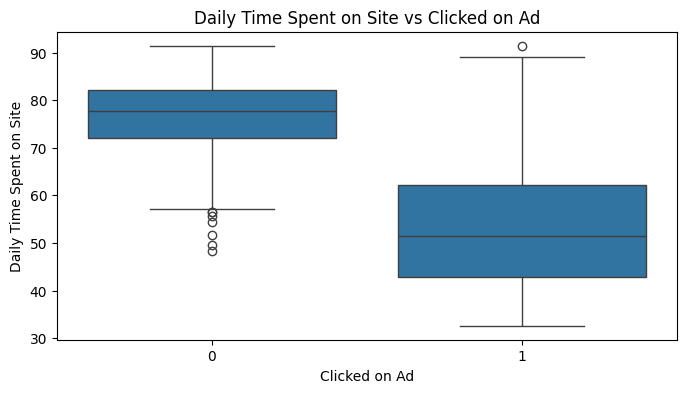

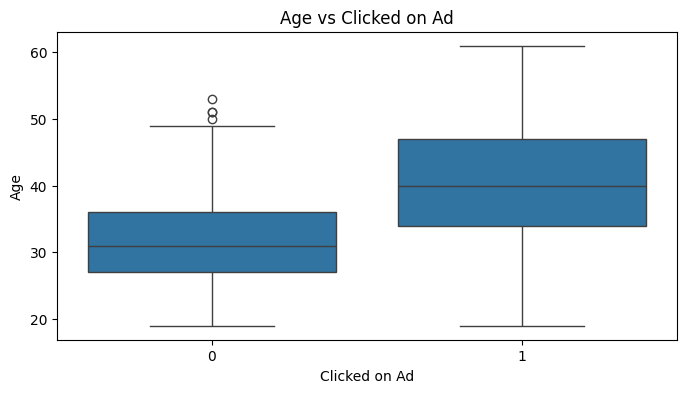

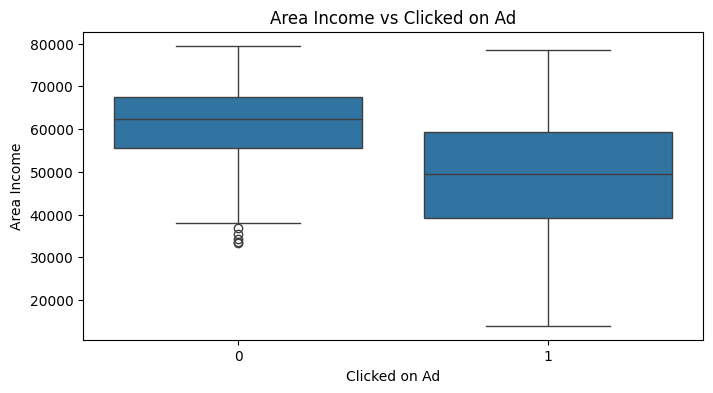

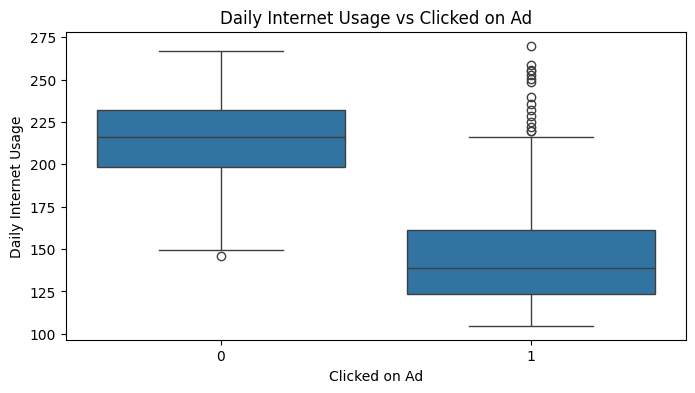

In [ ]:
# Boxplot of numerical features against target
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Clicked on Ad', y=col, data=df)
    plt.title(f'{col} vs Clicked on Ad')
    plt.show()

- rata rata user yang clik ads time spent on site dan daily internet usage lebih rendah.
- rata rata orang yang umurnya lebih tua yang banyak click ads
- rata rata area income lebih kecil yang banyak click ads
- rata rata daily internet usage yang rendah yang click ads

Time-based Analysis

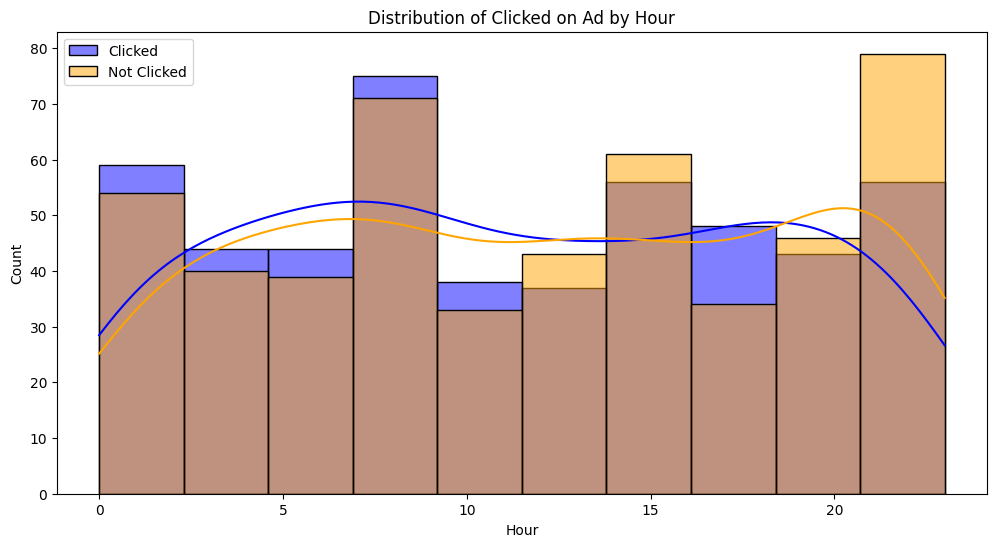

In [ ]:
#Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Hourly analysis based on 'Timestamp'
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'][df['Clicked on Ad'] == 1], color='blue', kde=True, label='Clicked')
sns.histplot(df['Hour'][df['Clicked on Ad'] == 0], color='orange', kde=True, label='Not Clicked')
plt.title('Distribution of Clicked on Ad by Hour')
plt.legend()
plt.show()

Dilihat dari distribution of clicked by hour, pengguna tinggi di sekitar jam 9 dan sekitar jam 21. Namun user cenderung lebih banyak click ads di sekitar jam 16-18

Segment Analysis

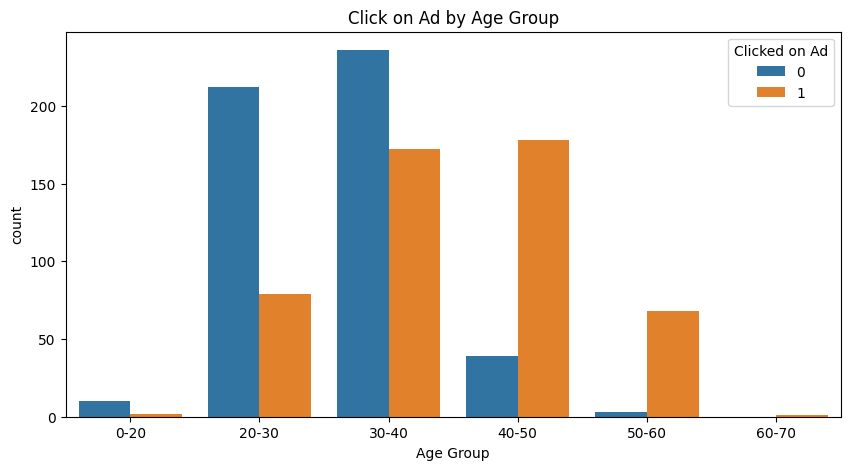

In [ ]:
# Analysis based on 'Age' segments
age_bins = [0, 20, 30, 40, 50, 60, 70]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70'])
plt.figure(figsize=(10, 5))
sns.countplot(x='Age Group', hue='Clicked on Ad', data=df)
plt.title('Click on Ad by Age Group')
plt.show()

Sebagian besar pengguna berusia 40-50 tahun melakukan clicked ads, sementara pengguna berusia 30-40 tahun memiliki jumlah clicked ads yang hampir setara dengan pengguna berusia 40-50.

## **FEATURE ENGINEERING**

### **Split Dataset**

In [ ]:
# define the feature variables
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Hour', 'DayOfWeek']
X = df[features]

# define the target variables
target = 'Clicked on Ad'

y = df[target]
# Display the first few rows of the features and target
X.head(), y.head()

(   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
 0                     68.95   35     61833.90                256.09     0   
 1                     80.23   31     68441.85                193.77     1   
 2                     69.47   26     59785.94                236.50     0   
 3                     74.15   29     54806.18                245.89     1   
 4                     68.37   35     73889.99                225.58     0   
 
    Hour  DayOfWeek  
 0     0          6  
 1     1          0  
 2    20          6  
 3     2          6  
 4     3          4  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Clicked on Ad, dtype: int64)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape

((800, 7), (200, 7))

### **Missing Value Handling**

In [ ]:
#check missing value
df.isna().sum()


,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [ ]:
for col in df.columns:
  print(f"==========={col}========")
  display(df[col].value_counts())

===========Daily Time Spent on Site========


,count
Daily Time Spent on Site,
77.05,3
62.26,3
75.55,3
84.53,3
78.76,3
...,...
61.09,1
65.77,1
37.87,1


===========Age========


,count
Age,
31,60
36,50
28,48
29,48
33,43
35,39
30,39
34,39
32,38


===========Area Income========


,count
Area Income,
61833.90,1
58966.22,1
69805.70,1
60315.19,1
67323.00,1
...,...
74024.61,1
60550.66,1
57983.30,1


===========Daily Internet Usage========


,count
Daily Internet Usage,
161.16,2
158.22,2
228.81,2
162.44,2
211.87,2
...,...
115.35,1
230.91,1
205.50,1


===========Ad Topic Line========


,count
Ad Topic Line,
Cloned 5thgeneration orchestration,1
Synchronized multi-tasking ability,1
Customer-focused impactful success,1
Open-source optimizing parallelism,1
Organic logistical adapter,1
...,...
Enhanced zero tolerance Graphic Interface,1
De-engineered tertiary secured line,1
Reverse-engineered well-modulated capability,1


===========City========


,count
City,
Lisamouth,3
Williamsport,3
Wrightburgh,2
Lake Jose,2
Robertfurt,2
...,...
Burgessside,1
Hurleyborough,1
Garychester,1


===========Male========


,count
Male,
0,519
1,481


===========Country========


,count
Country,
France,9
Czech Republic,9
Peru,8
Turkey,8
Greece,8
...,...
Romania,1
British Indian Ocean Territory (Chagos Archipelago),1
Germany,1


===========Timestamp========


,count
Timestamp,
2016-03-27 00:53:11,1
2016-01-07 23:02:43,1
2016-04-05 08:18:45,1
2016-04-17 18:38:14,1
2016-02-03 16:54:33,1
...,...
2016-03-13 13:50:25,1
2016-07-16 14:13:54,1
2016-04-18 00:49:33,1


===========Clicked on Ad========


,count
Clicked on Ad,
0,500
1,500


===========Hour========


,count
Hour,
7,54
20,50
9,49
21,48
0,45
23,44
5,44
22,43
14,43


===========DayOfWeek========


,count
DayOfWeek,
6,159
2,156
4,155
3,142
0,140
5,126
1,122


===========Age Group========


,count
Age Group,
30-40,408
20-30,291
40-50,217
50-60,71
0-20,12
60-70,1


Tidak terdapat nilai Null dan juga nilai tidak wajar. sehingga tidak perlu melakukan handling missing value

### **Outlier Handling**

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    print(Q1)
    Q3 = data[column].quantile(0.75)
    print(Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print(upper_bound)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(outliers)
    return outliers


def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()



Daily Time Spent on Site


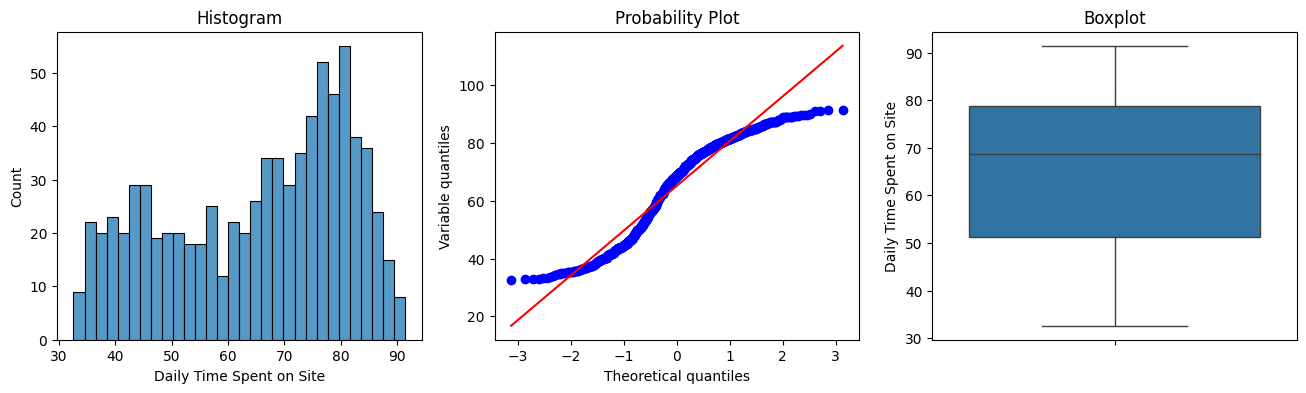

Age


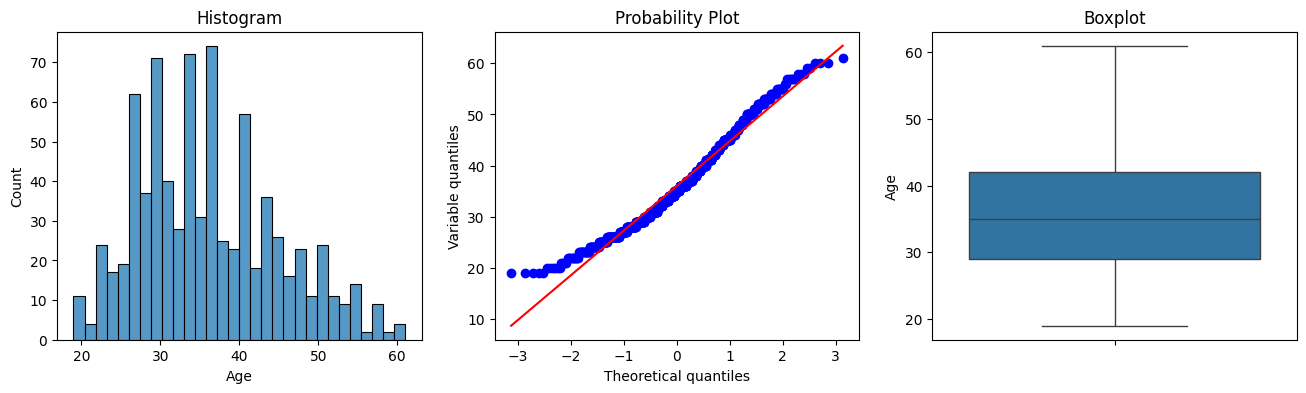

Area Income


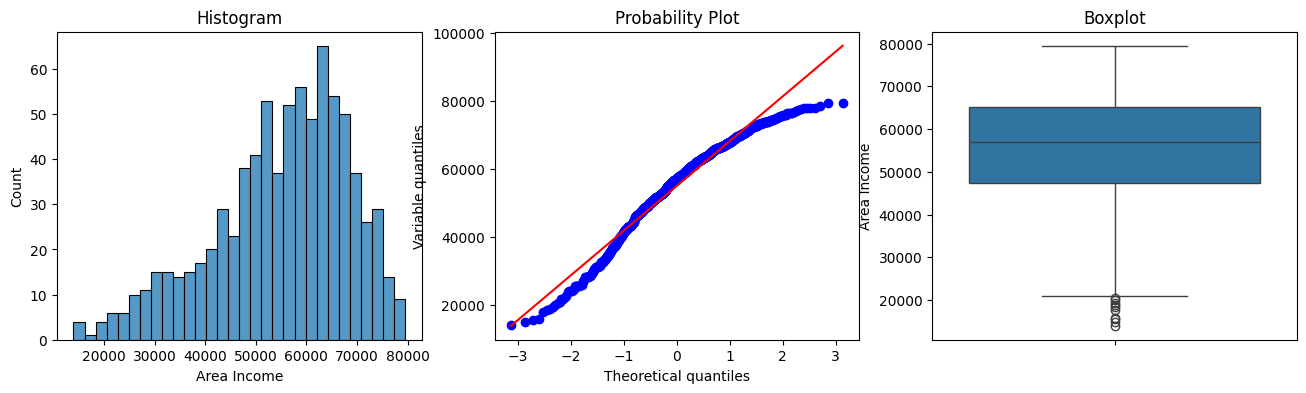

Daily Internet Usage


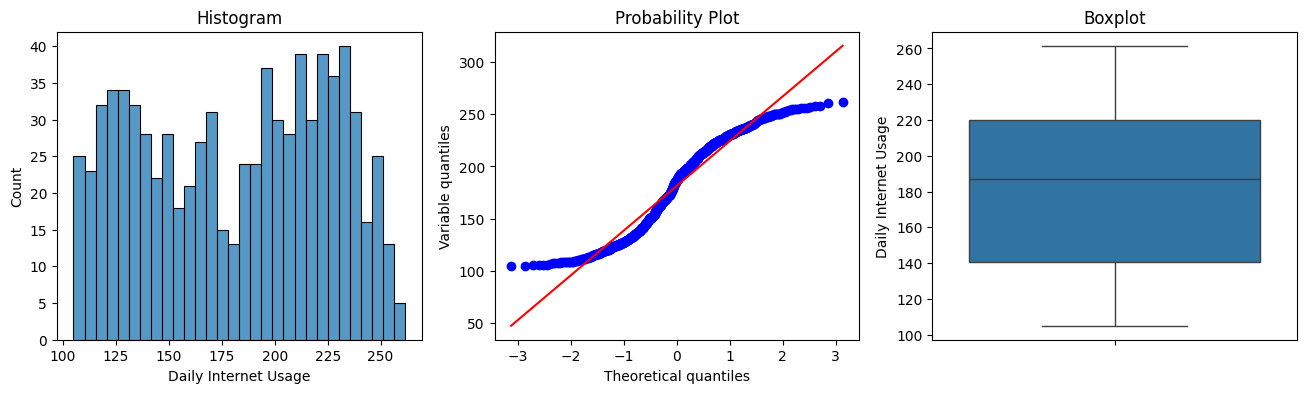

In [ ]:
columns_to_check = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

for column in columns_to_check:
  print(column)
  check_plot(X_train, column)


Terdapat data outlier di kolom area income, dilakukan handling pada kolom tersebut.

In [ ]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary


upper_boundary, lower_boundary = find_outlier_boundary(X_train, 'Area Income')
X_train['Area Income'] = np.where(X_train['Area Income']>upper_boundary, upper_boundary, np.where(X_train['Area Income']<lower_boundary, lower_boundary, X_train['Area Income']))



Daily Time Spent on Site


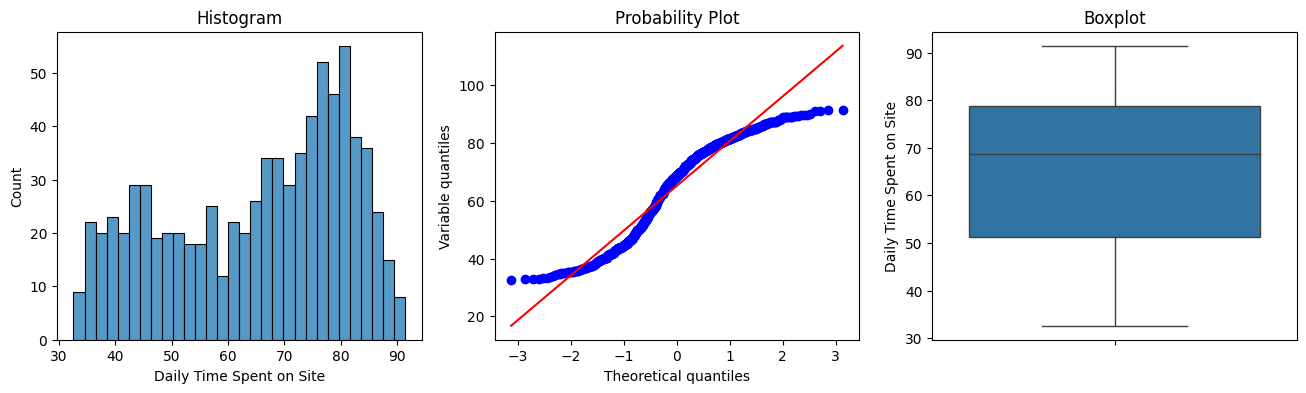

Age


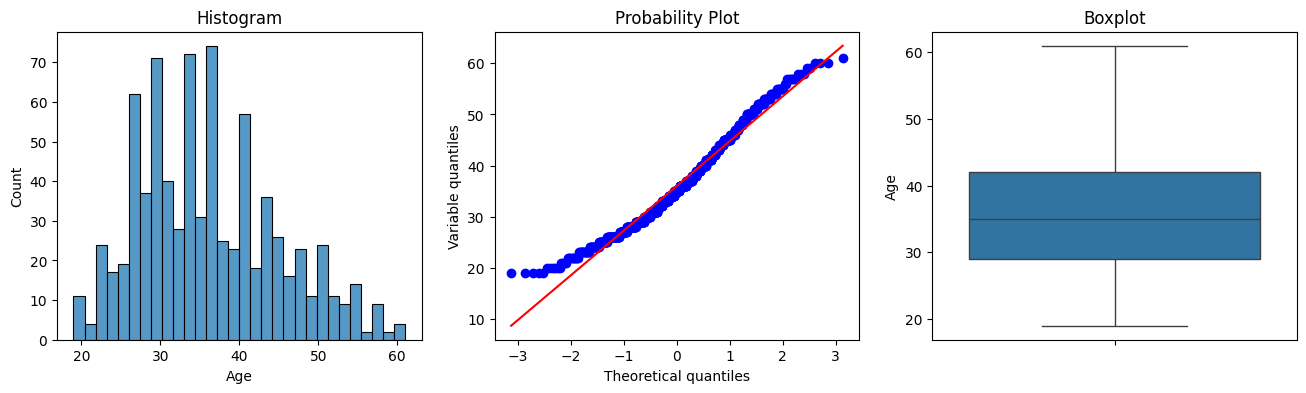

Area Income


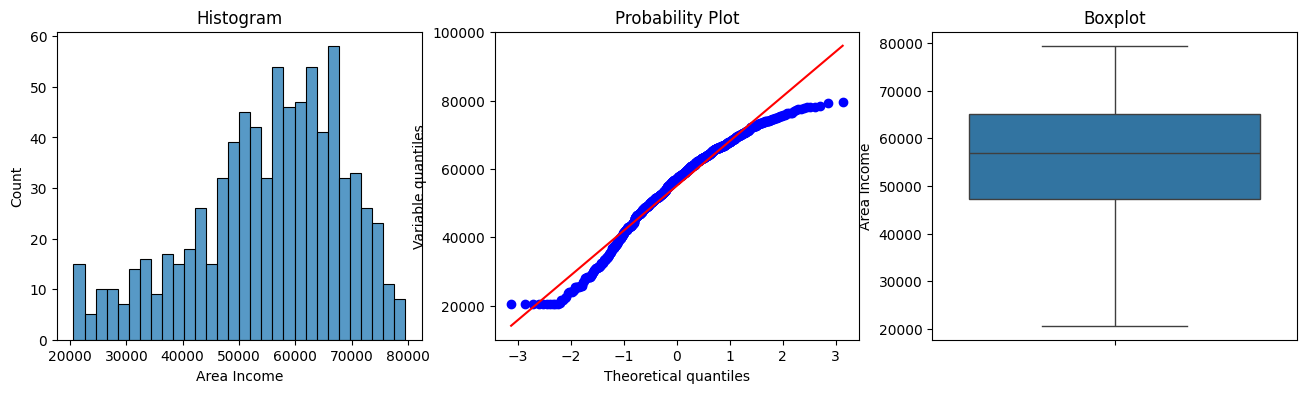

Daily Internet Usage


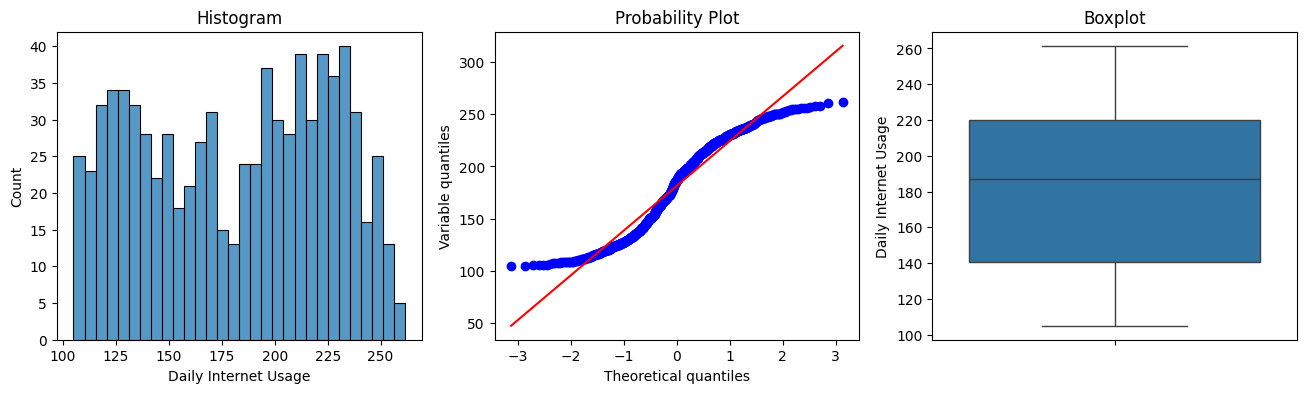

In [ ]:
columns_to_check = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

for column in columns_to_check:
  print(column)
  check_plot(X_train, column)

### **Encoding**

Kami tidak mempertimbangkan kolom "ad topic line," "city," dan "country" dalam model ini karena jumlah nilai unik dalam kolom-kolom tersebut terlalu banyak. Hal ini dapat menyebabkan kompleksitas yang berlebihan dan meningkatkan risiko overfitting, sehingga fokus pada fitur yang lebih relevan dan memiliki nilai yang lebih terkontrol akan meningkatkan kinerja model.

### **Feature Scaling**

In [ ]:
continuous_vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'DayOfWeek']
scaler = MinMaxScaler()


X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test[continuous_vars] = scaler.transform(X_test[continuous_vars])

X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,DayOfWeek
29,0.738059,0.071429,0.434326,0.669606,0,0.521739,0.333333
535,0.784634,0.309524,0.839121,0.658103,1,0.434783,0.333333
695,0.695054,0.452381,0.790199,0.889507,0,0.478261,1.000000
557,0.800102,0.214286,0.644872,0.778055,0,0.043478,0.333333
836,0.282339,0.642857,0.485730,0.067485,0,0.130435,1.000000


## MODELING

### Train logistic regression model

In [ ]:
# Initialize the Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Train the model on the training data
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Make predictions

In [ ]:
# Make predictions on the test set
y_pred = log_model.predict(X_test)

# Display the first few predictions
y_pred[:5]

array([1, 1, 1, 1, 0])

## EVALUATION

### Evaluate the model

Accuracy: 0.94
Precision: 0.97
Recall: 0.92
F1 Score: 0.94
              precision    recall  f1-score   support

           0       0.91      0.97      0.93        89
           1       0.97      0.92      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



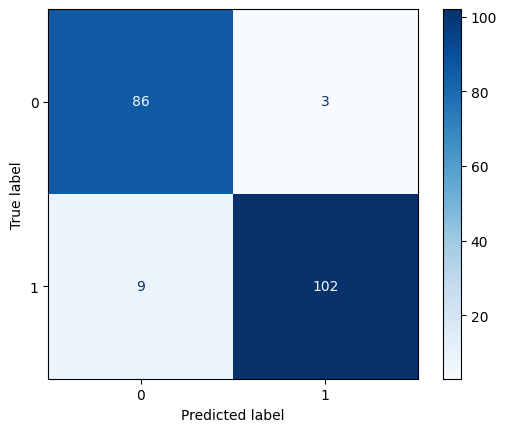

In [ ]:
#  Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#  Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the full classification report
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.show()

Model yang dievaluasi menunjukkan kinerja yang sangat baik dengan akurasi 0.94, yang berarti 94% dari semua prediksi adalah benar. Presisi untuk kelas 0 adalah 0.91 dan untuk kelas 1 adalah 0.97, menunjukkan bahwa model jarang membuat kesalahan dalam mengklasifikasikan kelas positif (1). Recall untuk kelas 0 mencapai 0.97 dan untuk kelas 1 adalah 0.92, menandakan bahwa model berhasil menangkap sebagian besar contoh dari kedua kelas. F1 Score keseluruhan adalah 0.94, mencerminkan keseimbangan yang baik antara presisi dan recall. Dengan support masing-masing 89 untuk kelas 0 dan 111 untuk kelas 1, model ini berfungsi efektif pada dataset yang sedikit tidak seimbang, serta memiliki nilai macro dan weighted average yang konsisten, menunjukkan performa yang dapat diandalkan.

## Advanced: Scikit learn pipeline

### Reload the dataset and redefine the low_cost columns

In [ ]:
from sklearn.pipeline import Pipeline


#Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# define all the categorical and continuous columns
# Identify categorical and continuous columns
continuous_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'DayOfWeek']

# create features and target
X_raw = df.drop(['Ad Topic Line', 'City','Country', 'Timestamp','Clicked on Ad'], axis=1)  # Drop 'Ad Topic Line', 'City', 'Timestamp' and the binary target column
y = df['Clicked on Ad']  # Binary target

### Train test split

In [ ]:
# split dataset to train and test set
X_train_raw, X_test_raw, y_train_class, y_test_class = train_test_split(X_raw, y, test_size=0.2, random_state=42)

### Define column transformers

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), continuous_columns),  # Scale continuous variables
    ]
)

### Integrate preprocessor with Logistic regression

In [ ]:
# Create the full pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Step 1: Preprocess data (scaling + one-hot encoding)
    ('classifier', LogisticRegression(random_state=42))  # Step 2: Logistic Regression
])

# TODO: Train the pipeline
pipeline.fit(X_train_raw, y_train_class)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage',
                                                   'Hour', 'DayOfWeek'])])),
                ('classifier', LogisticRegression(random_state=42))])

### Evaluate the pipeline

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        89
           1       0.98      0.91      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



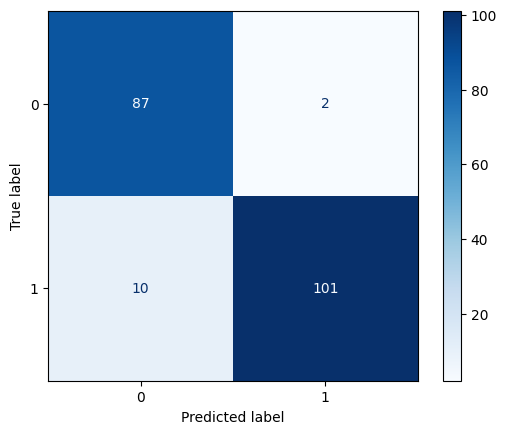

In [ ]:
# TODO: predict the test set
y_pred_pipeline = pipeline.predict(X_test_raw)

# TODO: get accuracy
accuracy = accuracy_score(y_test_class, y_pred_pipeline)
print(f"Accuracy: {accuracy:.2f}")

# TODO: Display the classification report
print(classification_report(y_test_class, y_pred_pipeline))


# TODO: Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test_raw, y_test_class, cmap='Blues')
plt.show()

# **UNSUPERVISED LEARNING (K-MEANS CLUSTERING)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# from google.colab import drive
# drive.mount('/content/drive')


## **Load Dataset**

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/ML5/DATASET/wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **Exploratory Data Analysis**


In [ ]:
print(f'Total data : {len(data)}')

Total data : 178


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Semua kolom adalah data numeric

In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


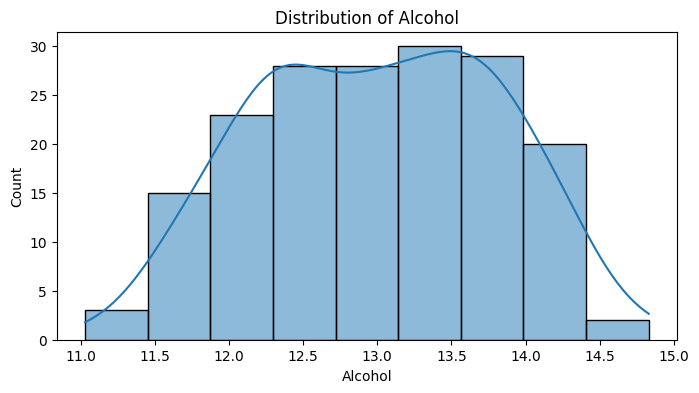

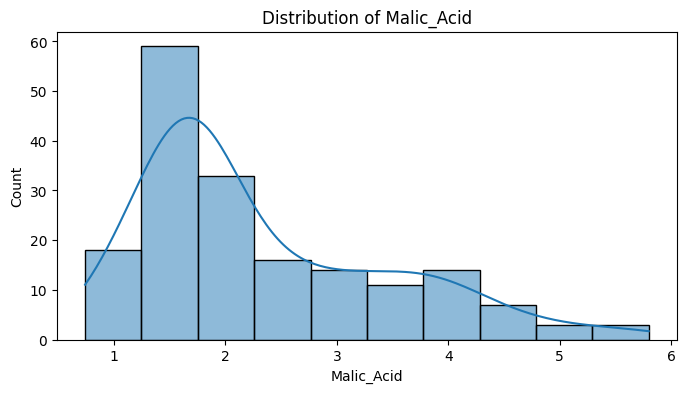

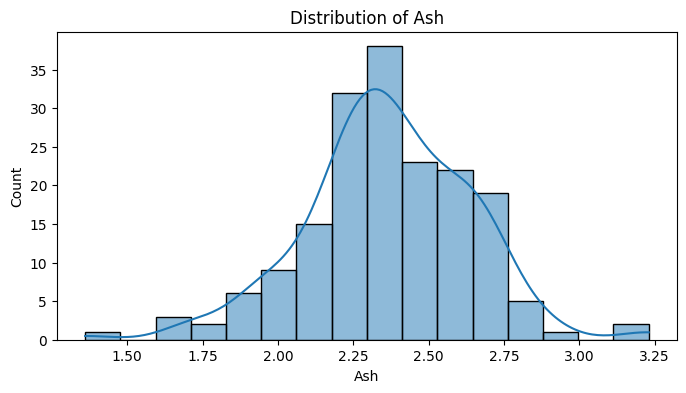

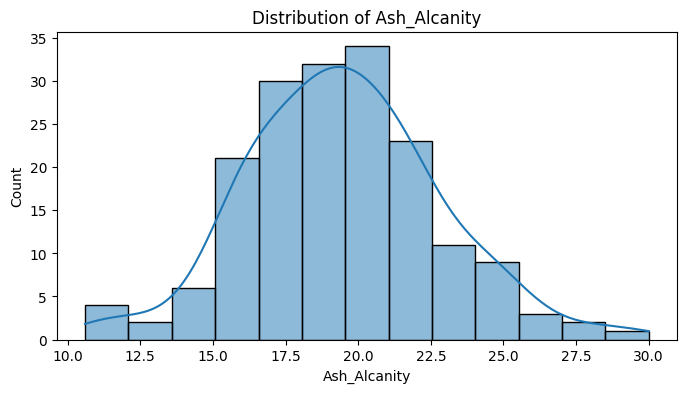

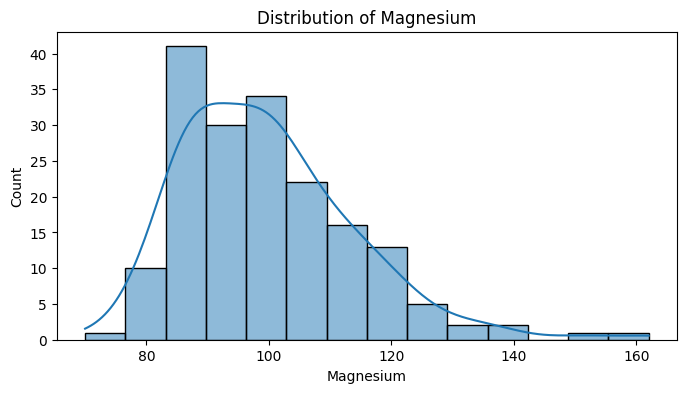

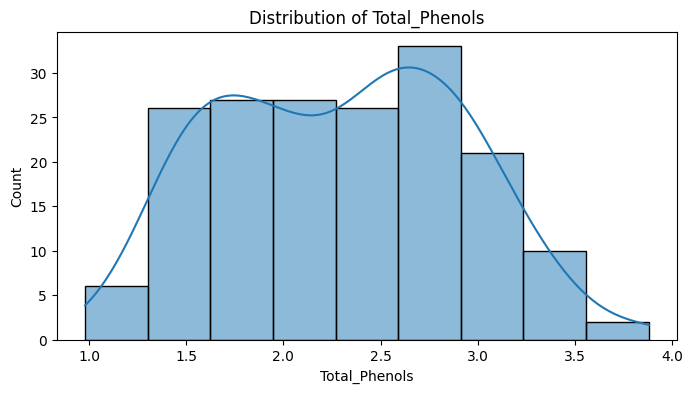

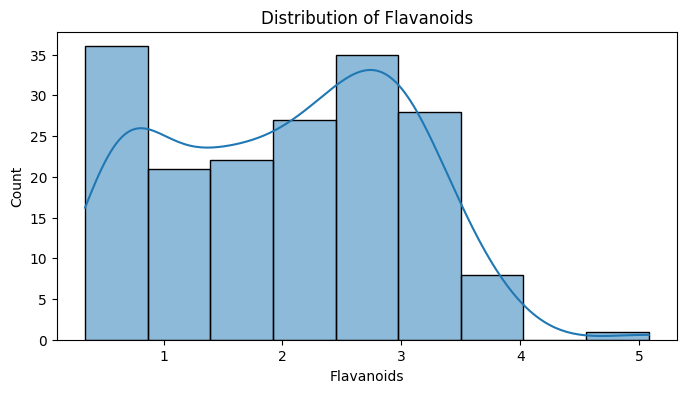

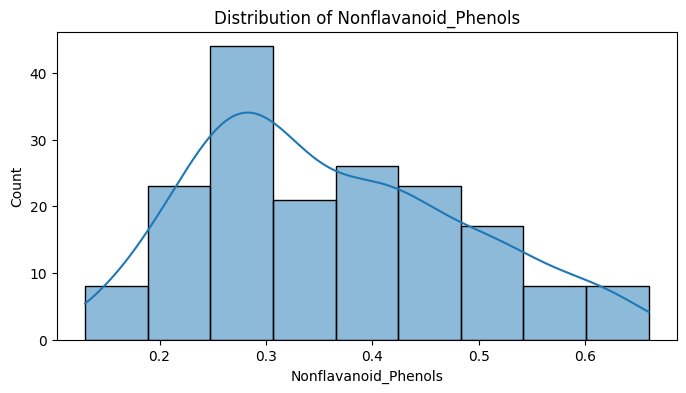

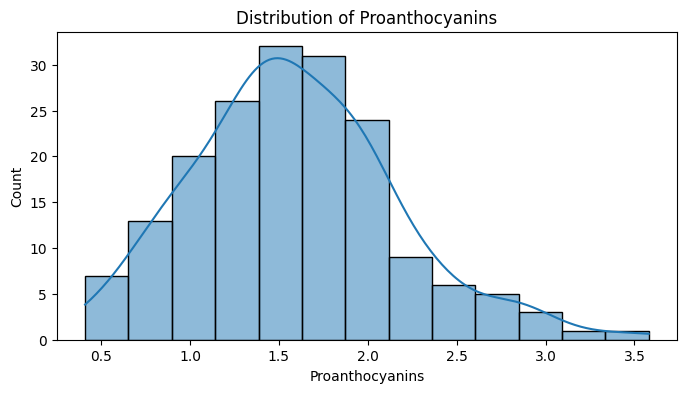

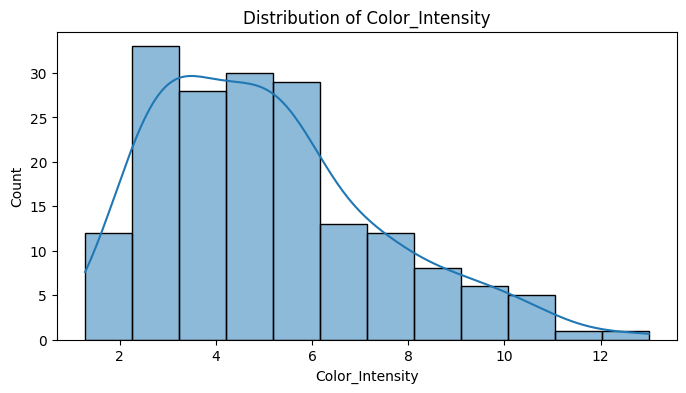

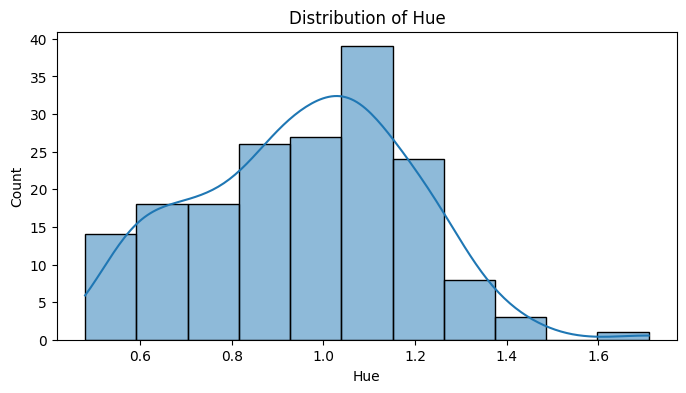

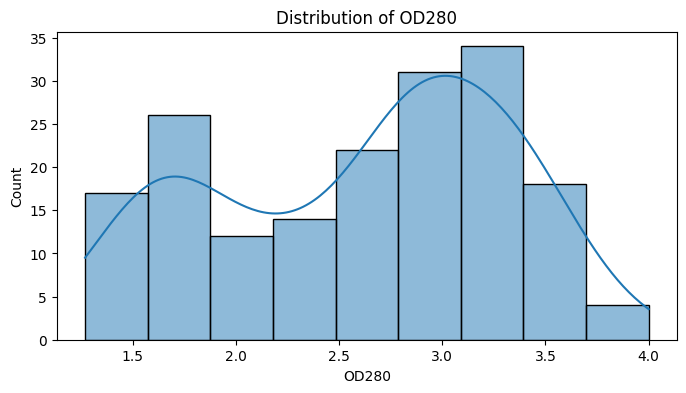

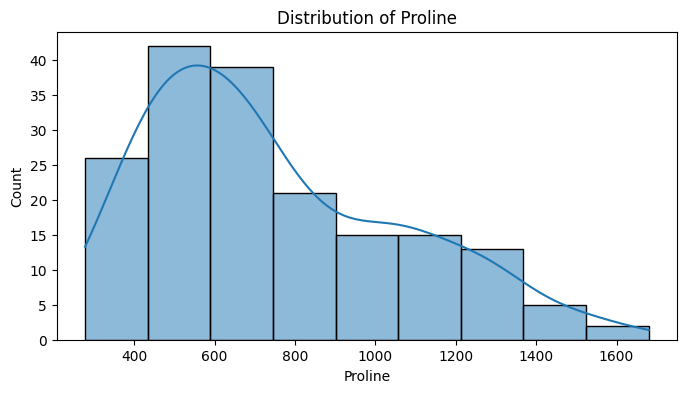

In [ ]:
# Numerical features distribution
numerical_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

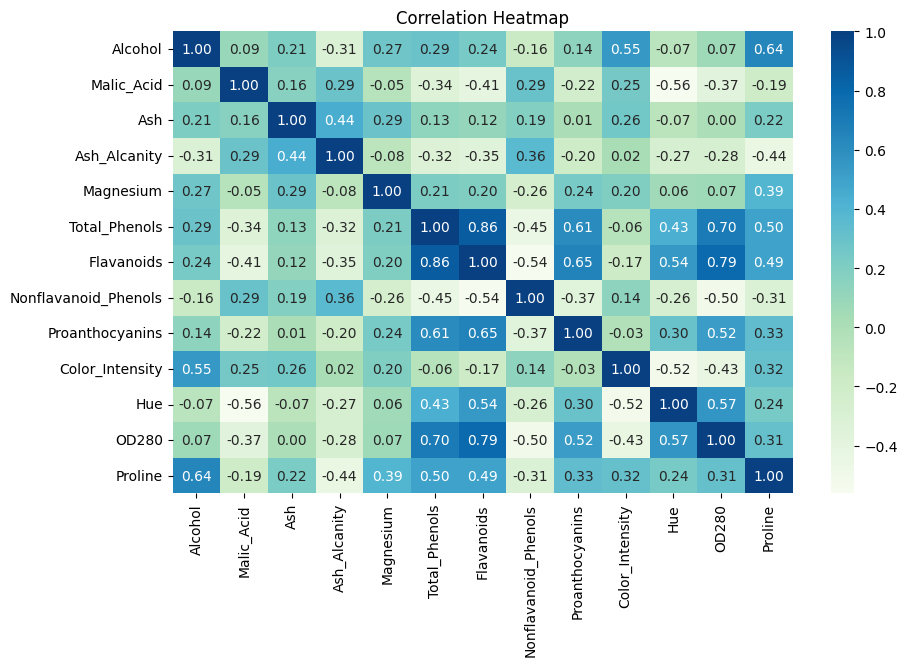

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap ='GnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap korelasi ini, kita dapat melihat beberapa variabel yang memiliki hubungan kuat yang mungkin dapat dijadikan fokus untuk analisis lebih lanjut, seperti Total_Phenols dengan Flavanoids dan OD280. Korelasi kuat antara beberapa variabel menunjukkan adanya keterkaitan dalam kandungan kimia yang mungkin dapat dipertimbangkan untuk pengelompokan (clustering) atau pengurangan dimensi (dimensionality reduction) dalam analisis lebih lanjut.

## **Feature Engineering**

### **Handling Missing Value**

In [ ]:
data.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
for col in data.columns:
  print(f"==========={col}========")
  display(data[col].value_counts())

===========Alcohol========


,count
Alcohol,
13.05,6
12.37,6
12.08,5
12.29,4
12.42,3
...,...
13.72,1
13.29,1
13.74,1


===========Malic_Acid========


,count
Malic_Acid,
1.73,7
1.67,4
1.81,4
1.68,3
1.61,3
...,...
1.09,1
1.19,1
1.17,1


===========Ash========


,count
Ash,
2.30,7
2.28,7
2.70,6
2.32,6
2.36,6
...,...
2.16,1
2.53,1
1.75,1


===========Ash_Alcanity========


,count
Ash_Alcanity,
20.0,15
16.0,11
21.0,11
18.0,10
19.0,9
...,...
12.4,1
17.1,1
16.4,1


===========Magnesium========


,count
Magnesium,
88,13
86,11
98,9
101,9
96,8
102,7
94,6
85,6
112,6


===========Total_Phenols========


,count
Total_Phenols,
2.20,8
2.80,6
3.00,6
2.60,6
2.00,5
...,...
3.52,1
2.23,1
2.63,1


===========Flavanoids========


,count
Flavanoids,
2.65,4
2.03,3
2.68,3
0.60,3
1.25,3
...,...
2.78,1
2.90,1
3.74,1


===========Nonflavanoid_Phenols========


,count
Nonflavanoid_Phenols,
0.43,11
0.26,11
0.29,10
0.32,9
0.27,8
0.30,8
0.34,8
0.40,8
0.37,8


===========Proanthocyanins========


,count
Proanthocyanins,
1.35,9
1.46,7
1.87,6
1.25,5
1.66,4
...,...
2.28,1
0.62,1
0.41,1


===========Color_Intensity========


,count
Color_Intensity,
2.60,4
4.60,4
3.80,4
3.40,3
5.00,3
...,...
6.30,1
7.05,1
7.20,1


===========Hue========


,count
Hue,
1.04,8
1.23,7
1.12,6
0.57,5
0.89,5
...,...
1.27,1
0.90,1
1.71,1


===========OD280========


,count
OD280,
2.87,5
1.82,4
3.00,4
2.78,4
1.56,3
...,...
2.23,1
2.46,1
1.59,1


===========Proline========


,count
Proline,
680,5
520,5
625,4
750,4
630,4
...,...
1265,1
1260,1
1080,1


Tidak terdapat nilai NAN atu NULL pada data, juga Tidak terdapat nilai tidak wajar dalam setiap kolom, sehingga dapat disimpulkan bahwa tidak terdapat missing value dalam data

### **Handling Outlier**

In [ ]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Alcohol


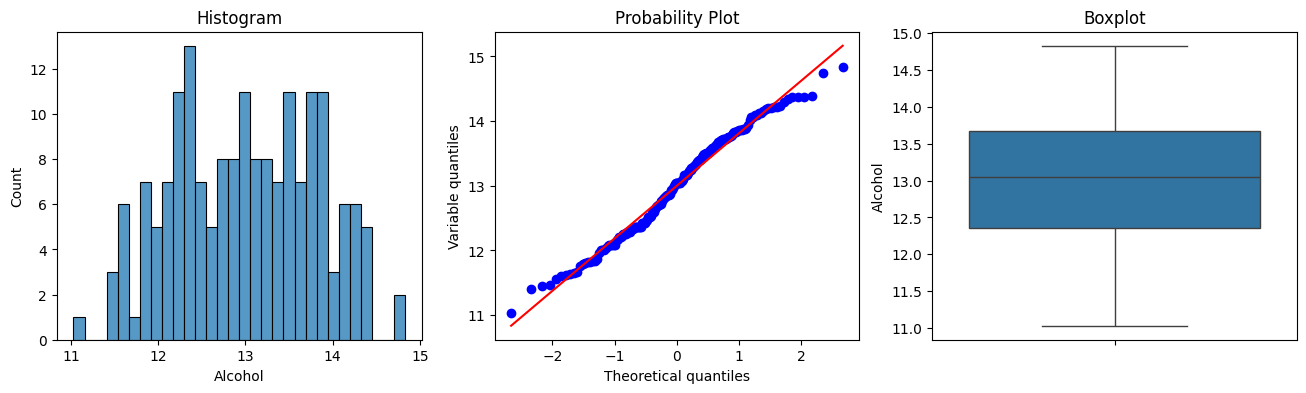

Malic_Acid


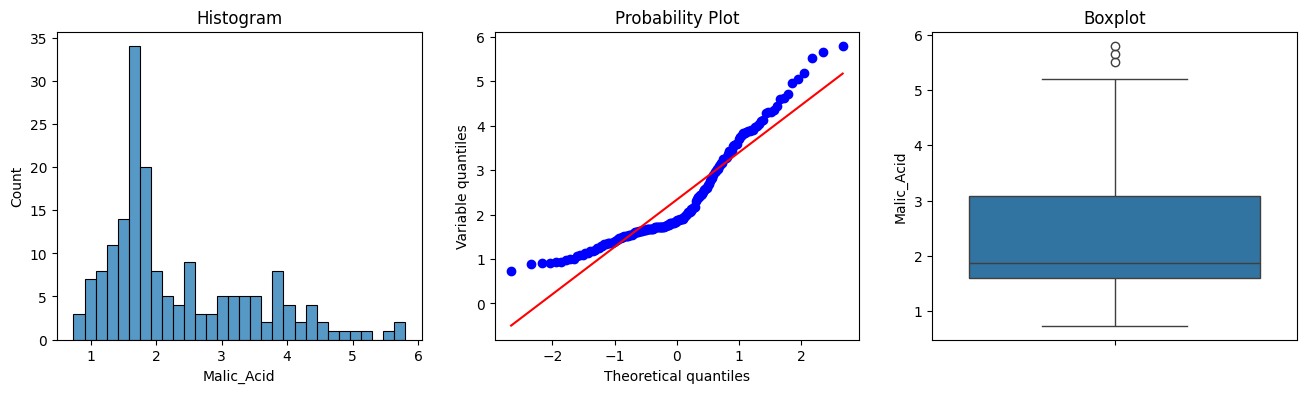

Ash


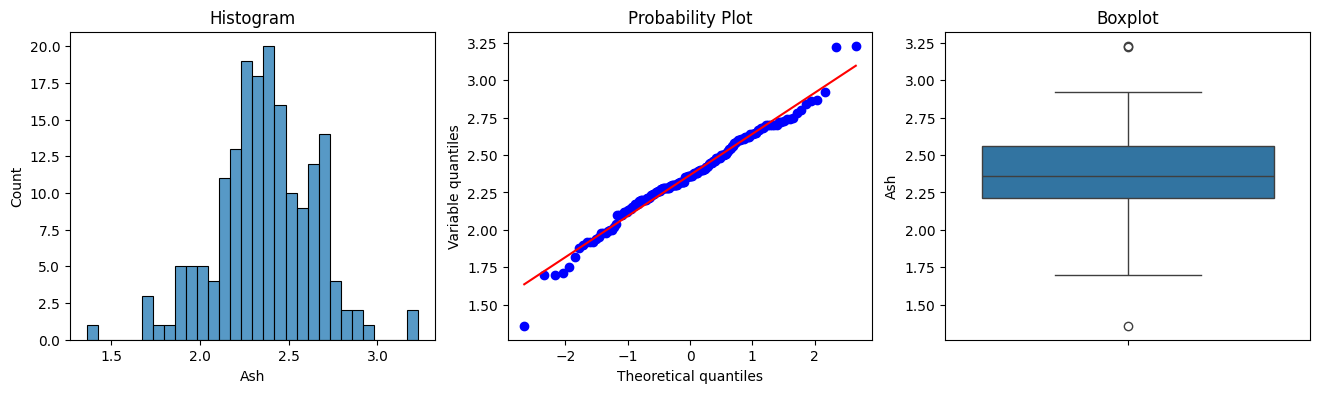

Ash_Alcanity


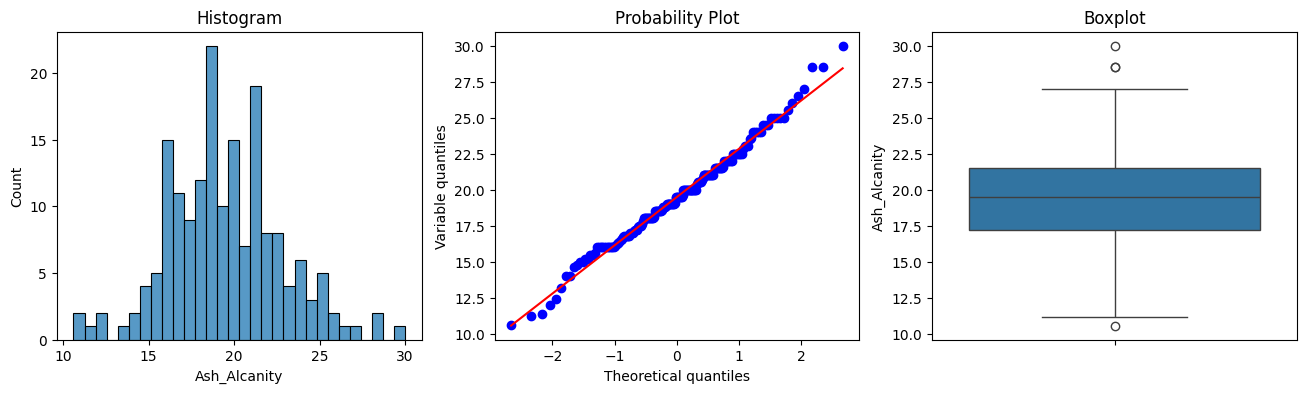

Magnesium


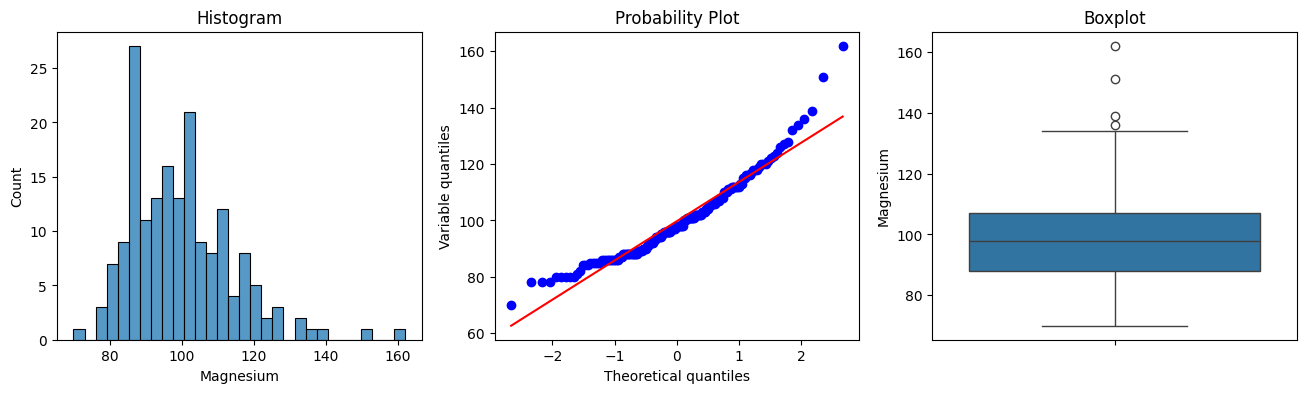

Total_Phenols


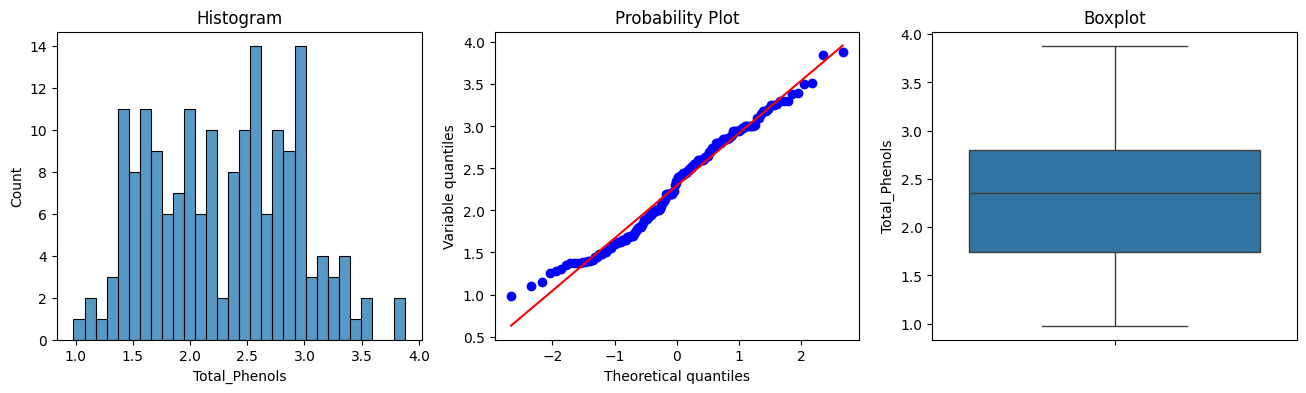

Flavanoids


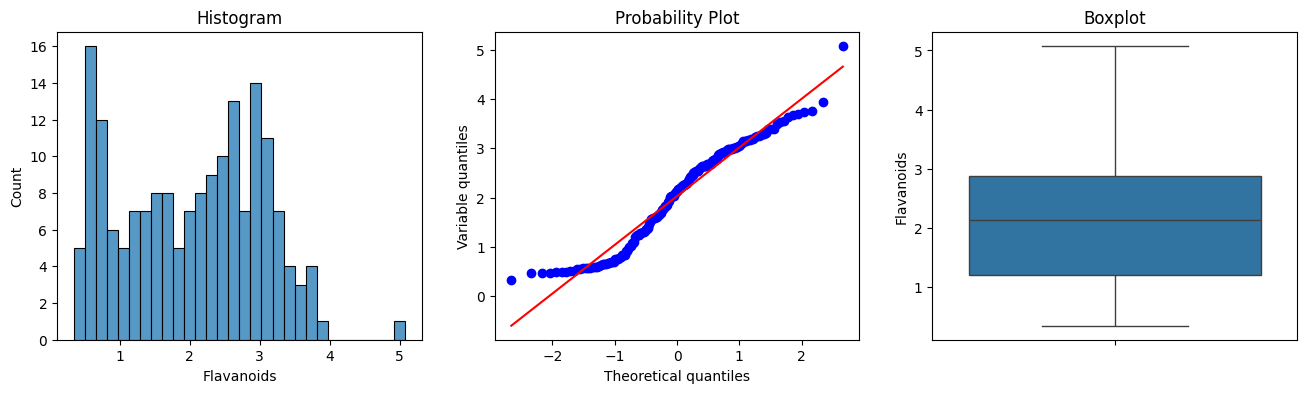

Nonflavanoid_Phenols


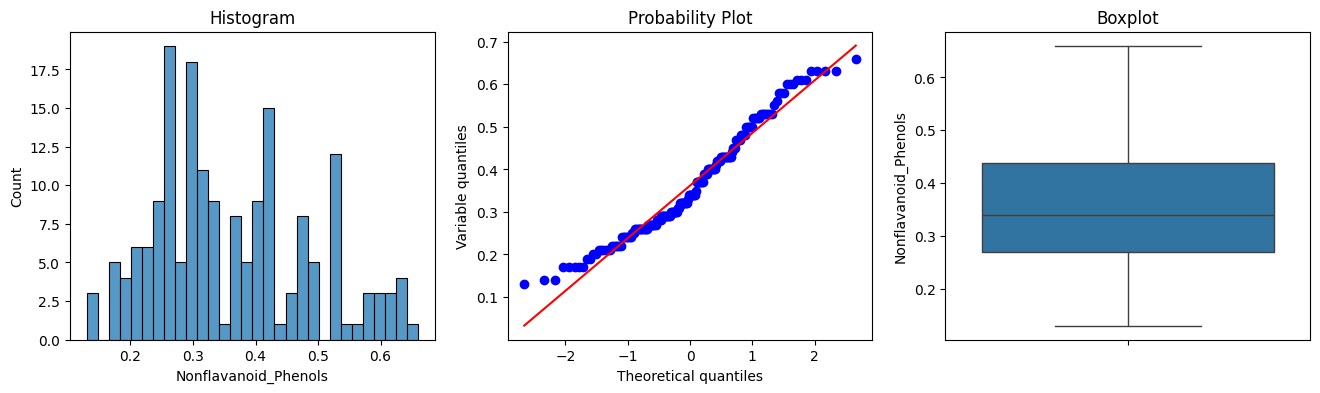

Proanthocyanins


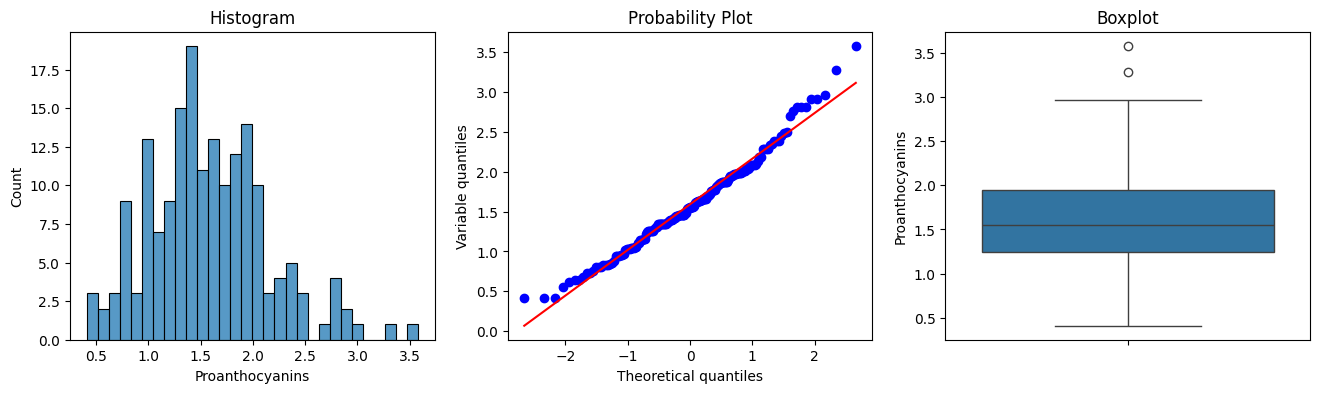

Color_Intensity


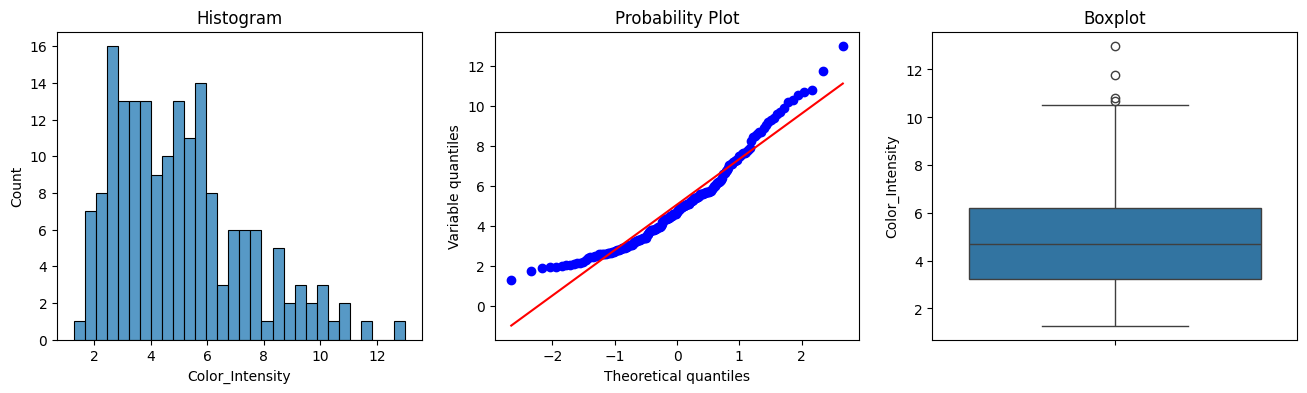

Hue


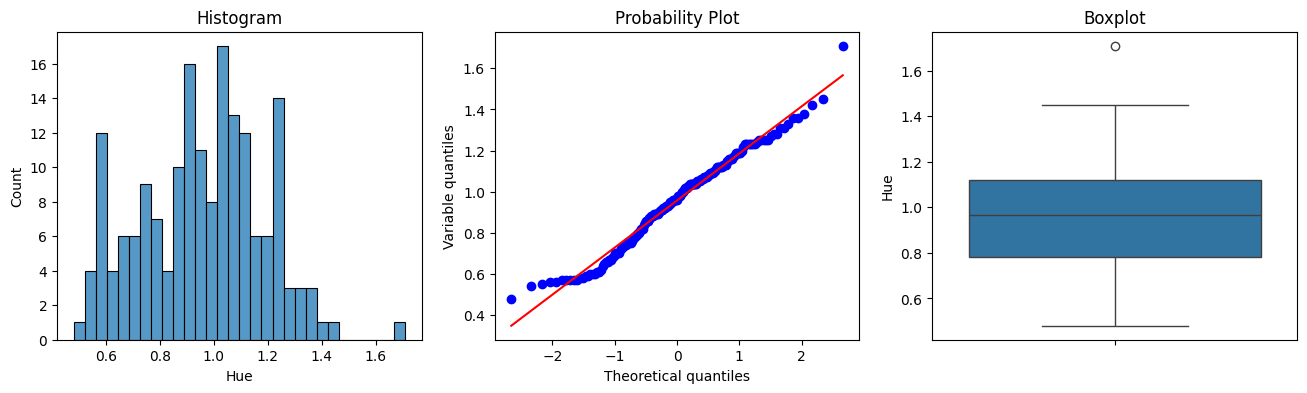

OD280


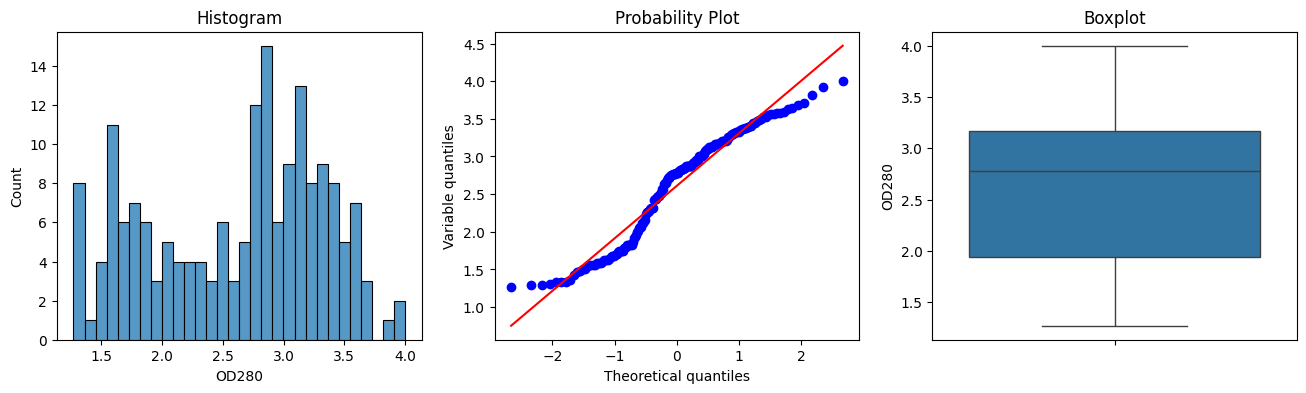

Proline


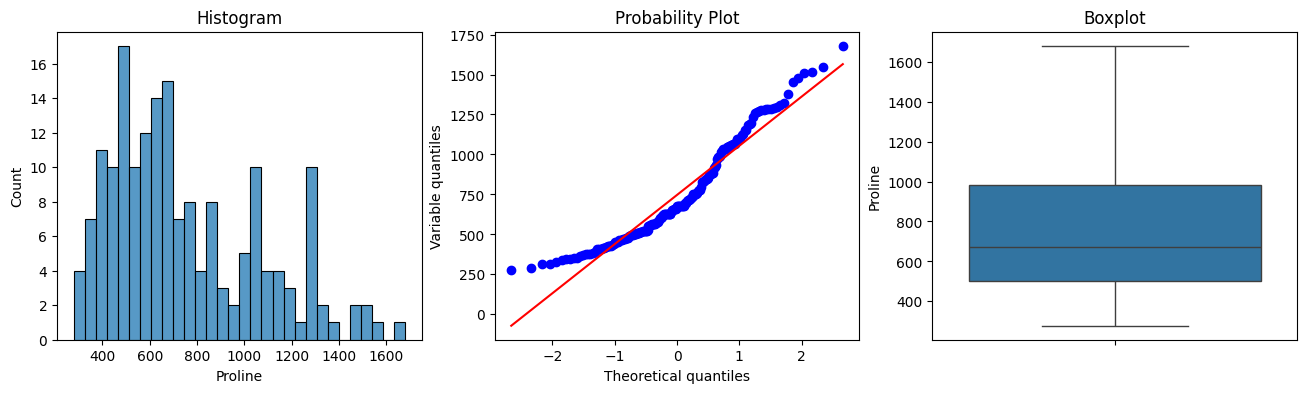

In [ ]:
# memvisualisasikan outlier di LSTAT
for col in data.columns:
  print(col)
  check_plot(data, col)

Terdapat outlier pada kolom Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, Hue. Dalam hal ini akan dilakukan handling outlier pada kolom tersebut

In [ ]:
col_outlier = 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue'
for col in col_outlier:
  upper_boundary, lower_boundary = find_outlier_boundary(data, col)
  data[col] = np.where(data[col]>upper_boundary, upper_boundary, np.where(data[col]<lower_boundary, lower_boundary, data[col]))


Alcohol


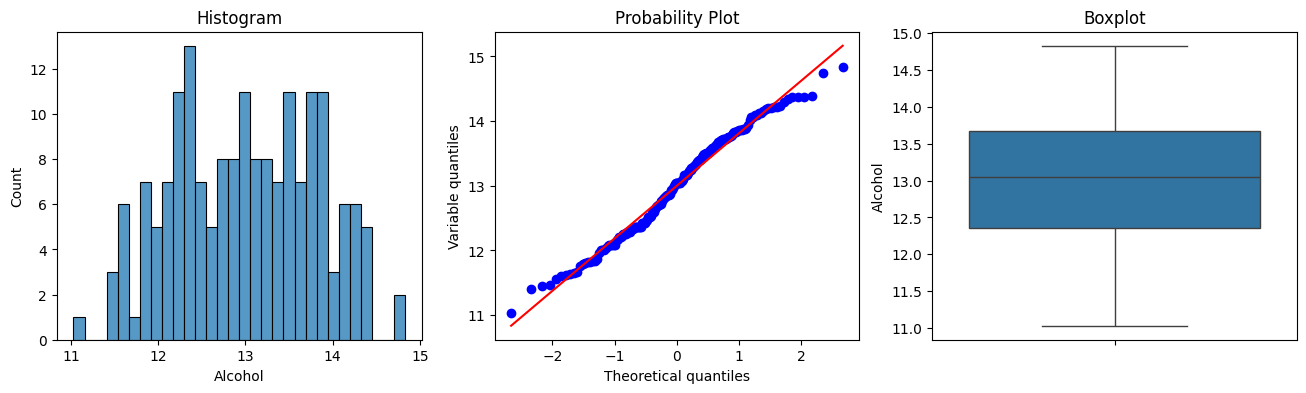

Malic_Acid


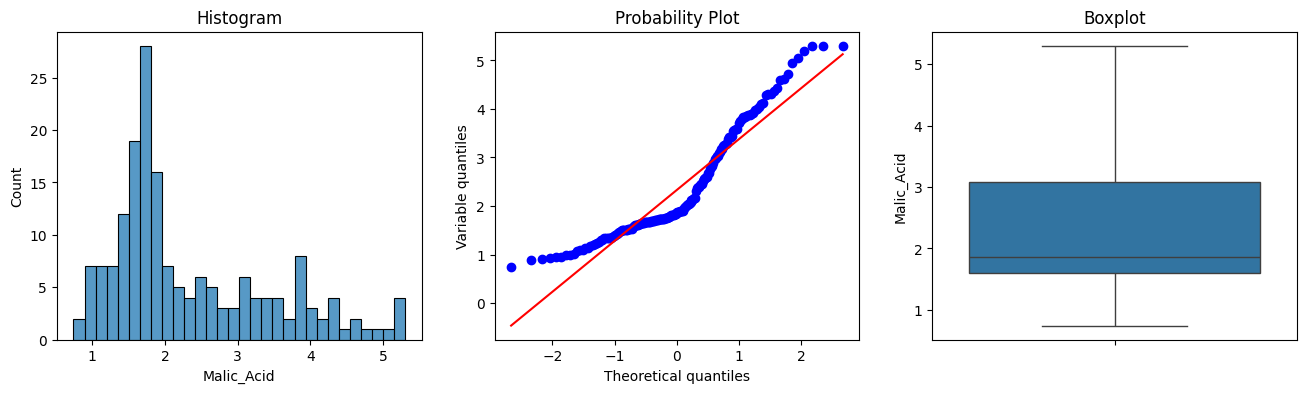

Ash


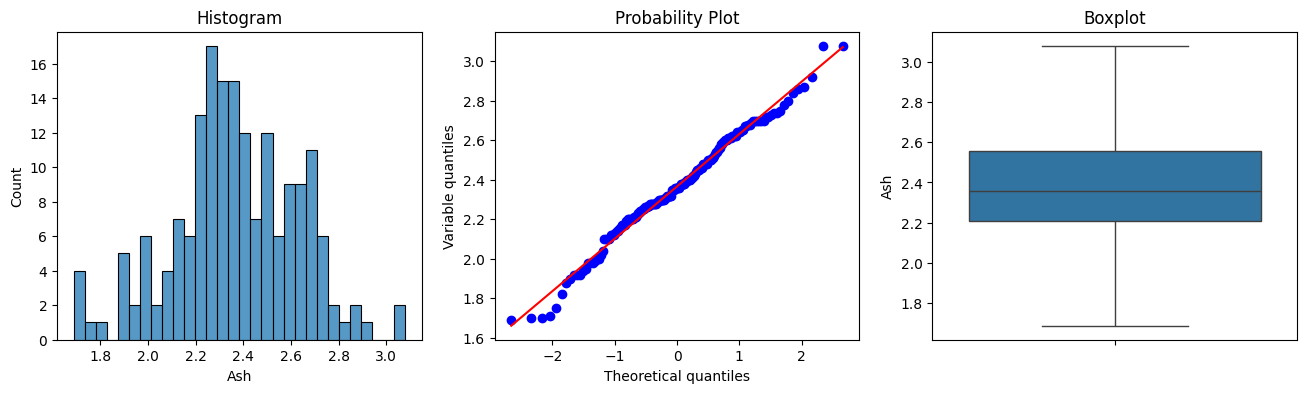

Ash_Alcanity


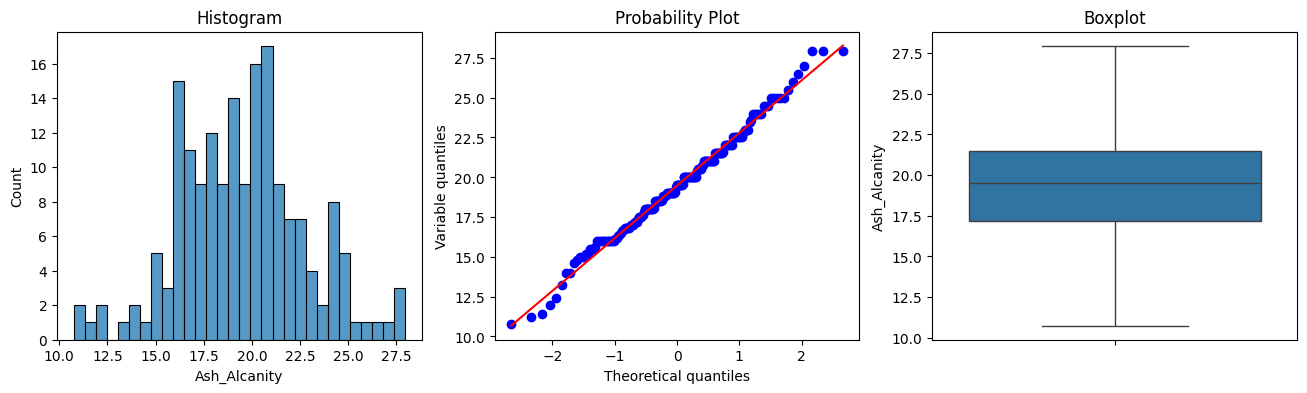

Magnesium


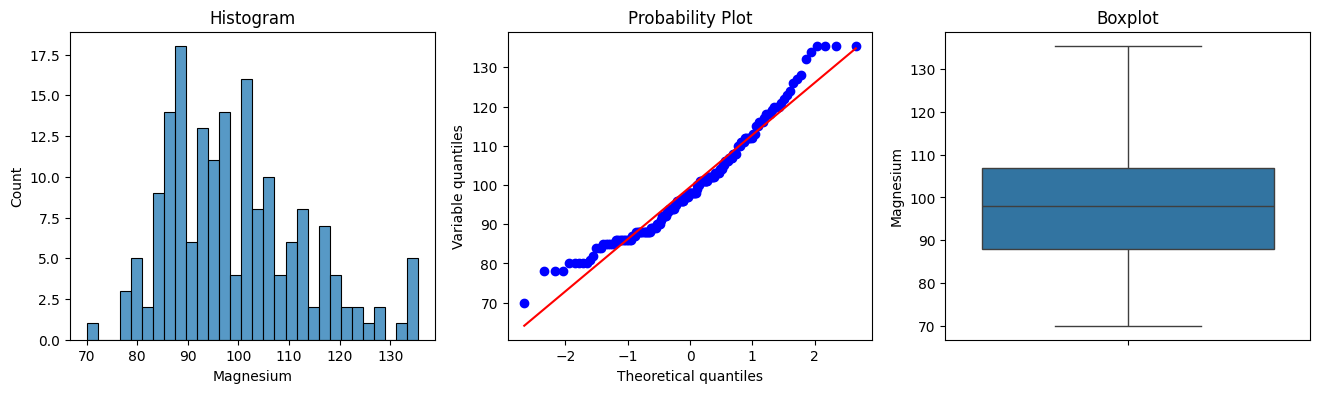

Total_Phenols


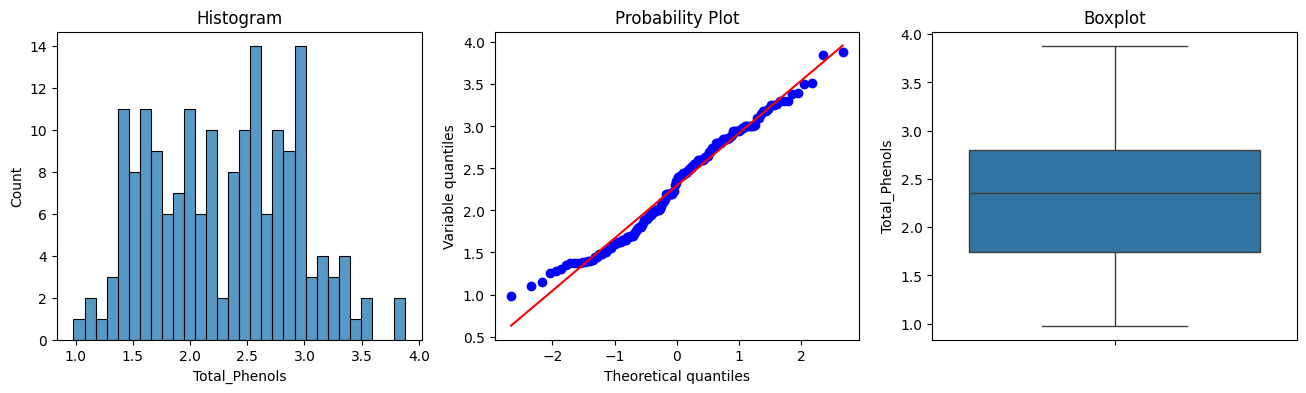

Flavanoids


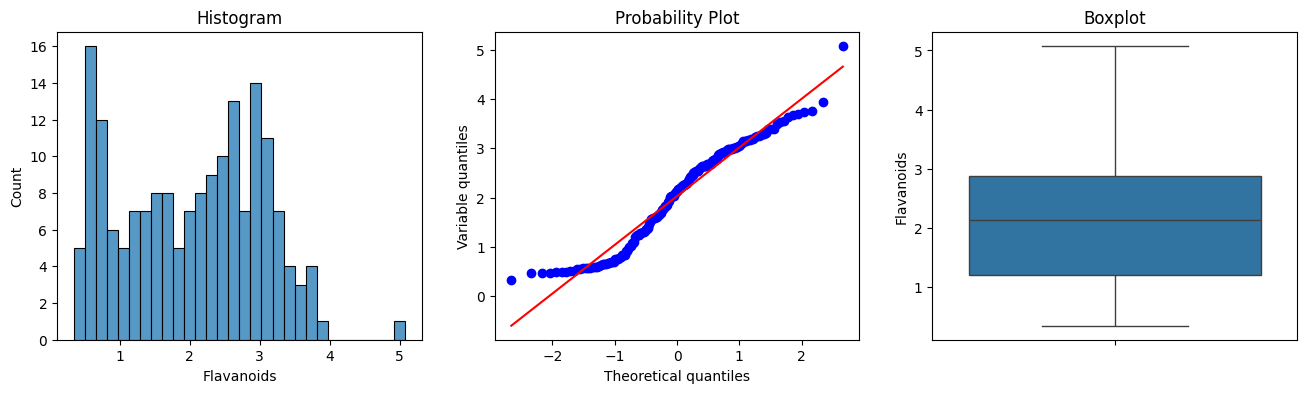

Nonflavanoid_Phenols


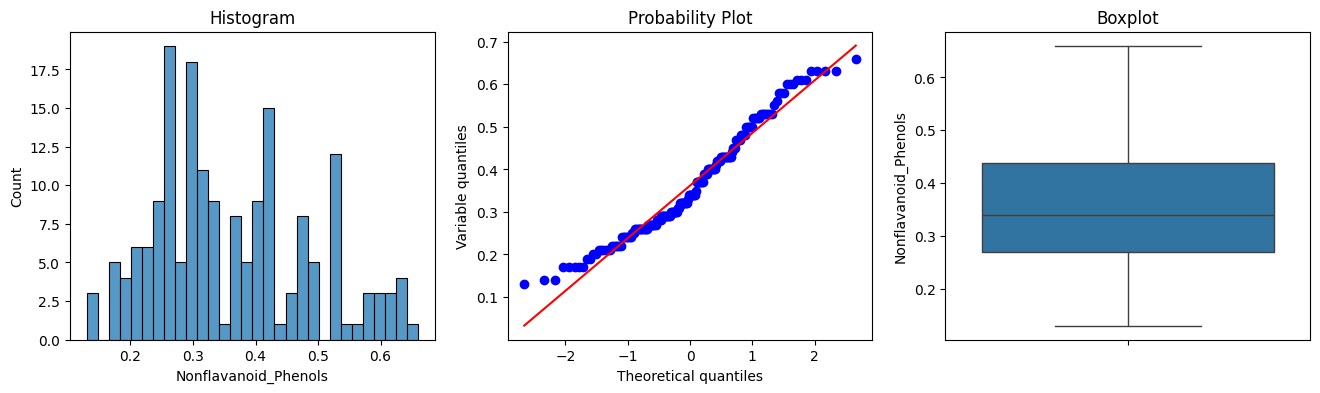

Proanthocyanins


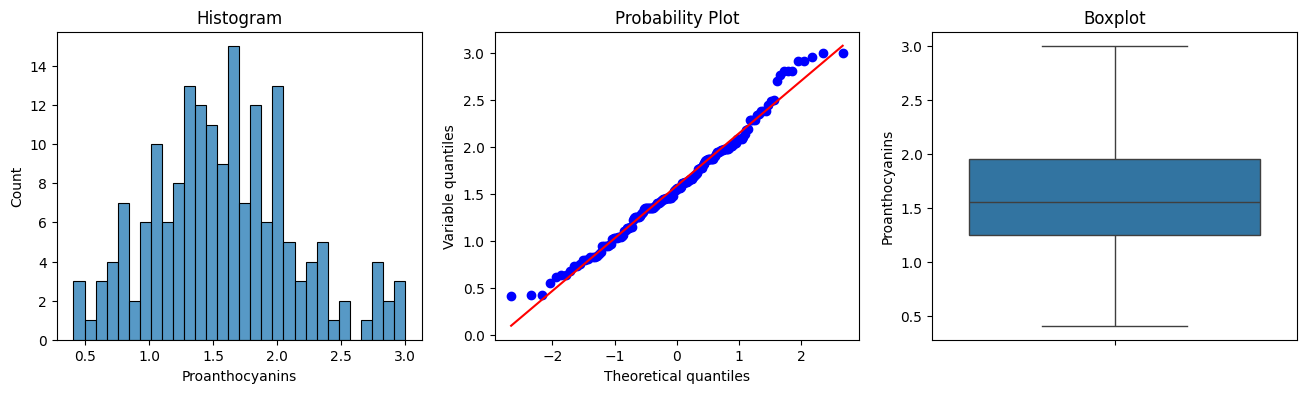

Color_Intensity


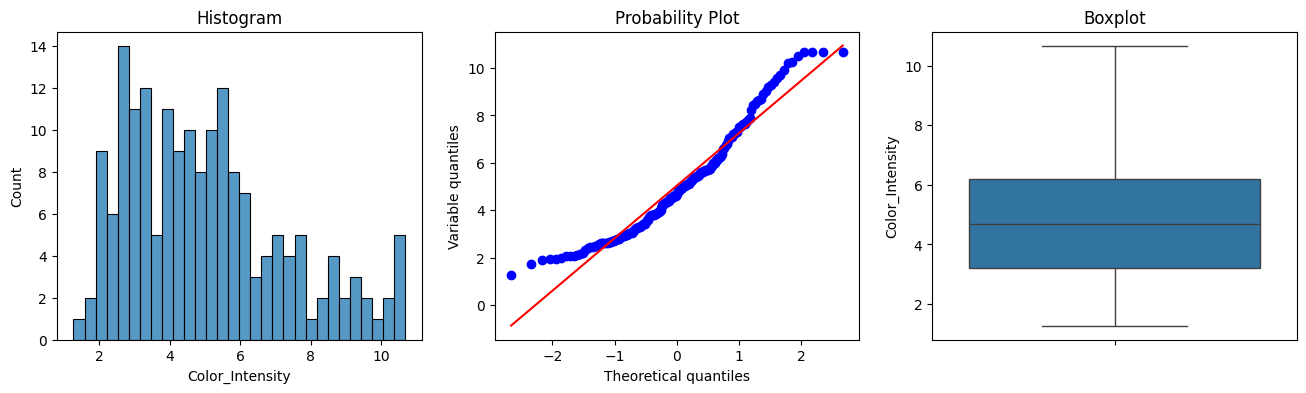

Hue


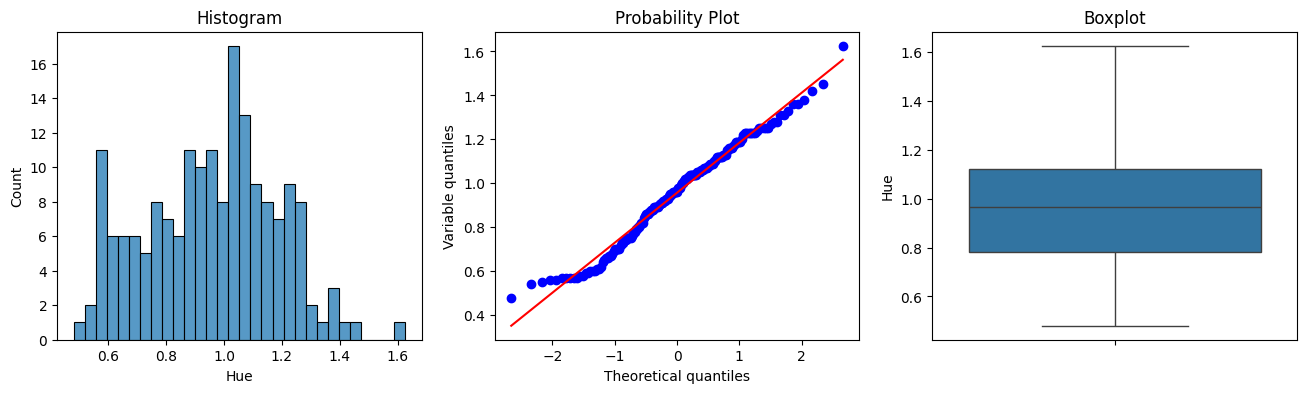

OD280


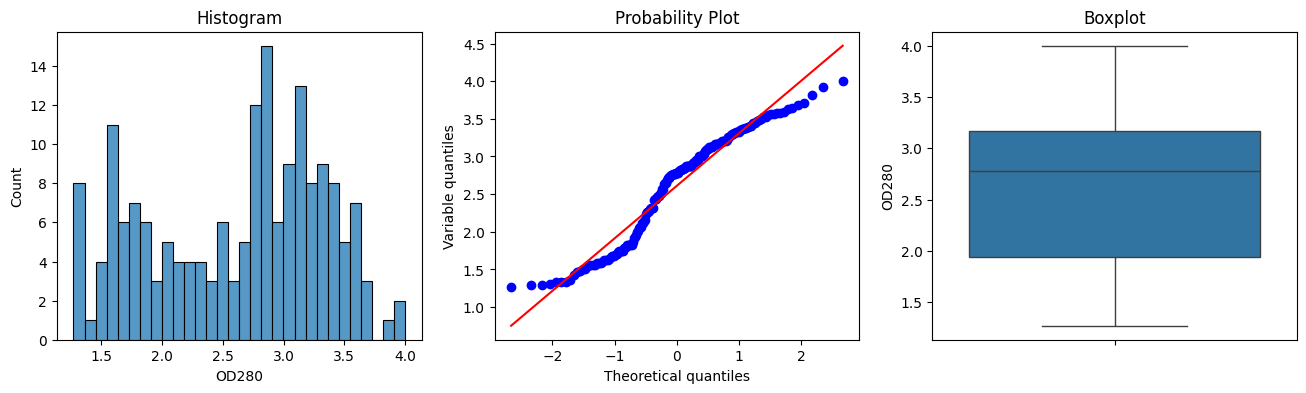

Proline


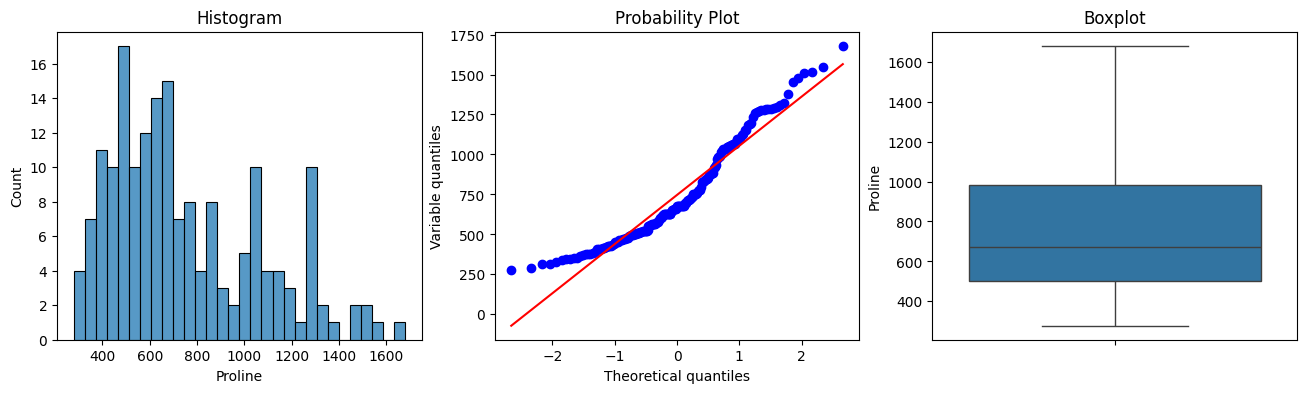

In [ ]:
for col in data.columns:
  print(col)
  check_plot(data, col)

Dapat dilihat pada diagram di atas sudah tidak terdapat outlier lagi sehingga data dapat lanjut diproses ke tahap berikutnya.

### **Encoding**

Karna semua kolom adalah data numeric, jadi tidak perlu melakukan encoding

### **Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
data_scaled= scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = data.columns

data_scaled.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963


## **Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

pca_df =pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])
pca_df.head(10)

,PCA1,PCA2
0,0.742378,0.334163
1,0.488848,-0.022596
2,0.547607,0.244359
3,0.809298,0.656370
4,0.215145,0.140491
5,0.615710,0.522832
6,0.548822,0.278330
7,0.464367,0.343839
8,0.515935,0.256812
9,0.620802,0.233739


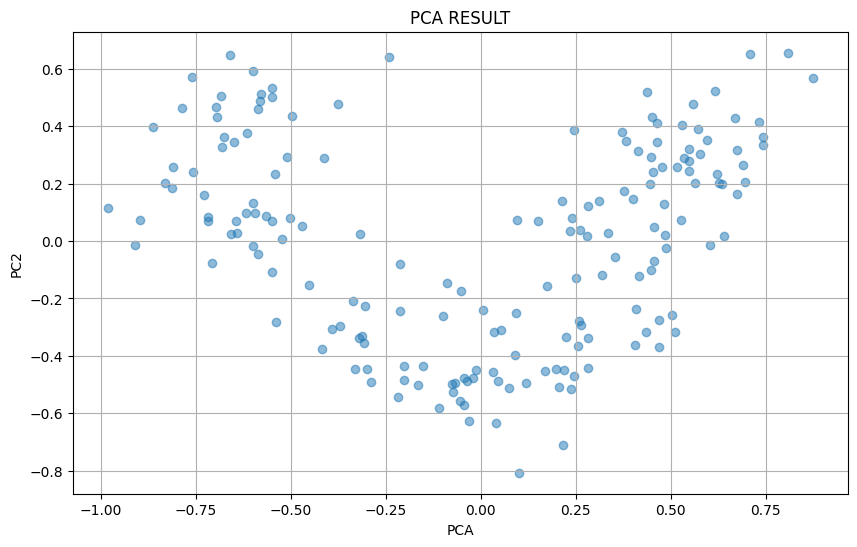

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('PCA RESULT')
plt.xlabel('PCA')
plt.ylabel('PC2')
plt.grid()
plt.show()

## **Clustering**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

## **Evaluation**

### **Elbow Method**

In [ ]:
k_values = range(1,11)

inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

inertia

[64.08623920817311,
 30.767109625439947,
 12.716762912416879,
 9.457241198917972,
 7.589563731365734,
 5.956512917863028,
 4.934863266250792,
 4.6165687520270655,
 4.139177636428212,
 3.890506112067984]

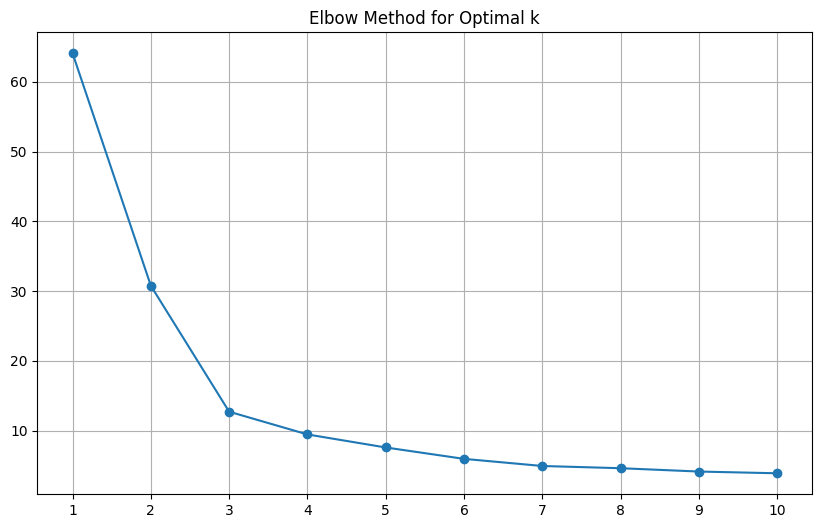

In [ ]:
# TODO: plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('')
plt.ylabel('')
plt.xticks(k_values)
plt.grid()
plt.show()

Jika dilihat dari grafik elbow, dengan membagi data menjadi 3 kluster sudah cukup karena penurunan inertia mulai melandai dan tidak terjadi penurunan yang signifikan lagi setelah jumlah kluster tersebut. Hal ini menunjukkan bahwa penambahan kluster lebih lanjut tidak memberikan perbaikan yang berarti dalam kualitas pengelompokan, sehingga 3 kluster dapat dianggap optimal untuk analisis ini. Dapat dilihat juga pada angka inertia bahwa pada 3 kluster dan 4 kluster (12,71% dan 9,45%), penurunan nilai inertia mulai melambat, sehingga Titik elbow yang paling mungkin berada di sekitar 3 cluster, di mana penurunan inertia mulai melambat secara signifikan.

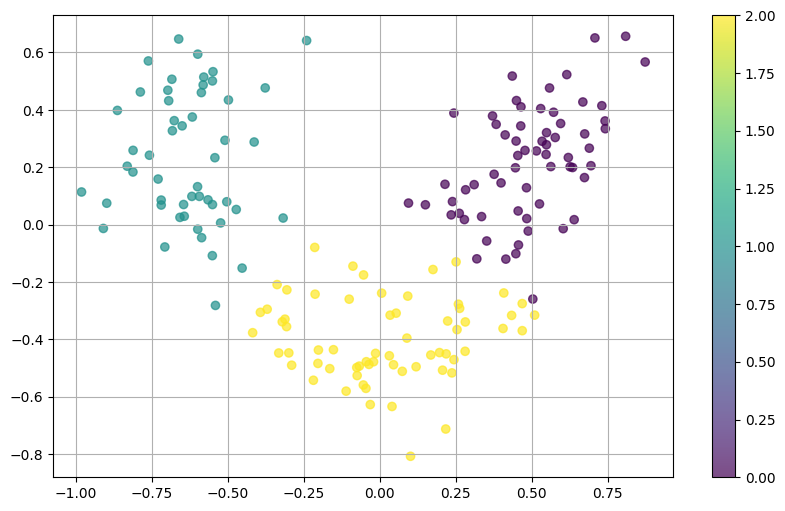

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=41)

pca_df['label cluster'] = kmeans.fit_predict(pca_df)


plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['label cluster'], cmap='viridis', alpha=0.7)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.colorbar(scatter, label='')
plt.grid()
plt.show()

Dilihat dari grafik, data terbagi dalam kluster yang cukup baik, dengan setiap kluster menunjukkan pemisahan yang jelas dan konsisten antara kelompok. Hal ini mengindikasikan bahwa pola dalam data dapat diidentifikasi dengan baik.

### **Test Gap statictic**

In [ ]:
from sklearn.metrics import pairwise_distances

def gap_statistic(data, n_clusters, n_refs=10):
    """Calculate the gap statistic."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    original_inertia = kmeans.inertia_
    refs = np.random.rand(n_refs, data.shape[1])
    reference_inertia = np.zeros(n_refs)

    for i in range(n_refs):
        kmeans.fit(refs)
        reference_inertia[i] = kmeans.inertia_
    gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)
    return gap



<ipython-input-38-f15c4dd026ca>:14: RuntimeWarning: divide by zero encountered in log
  gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)


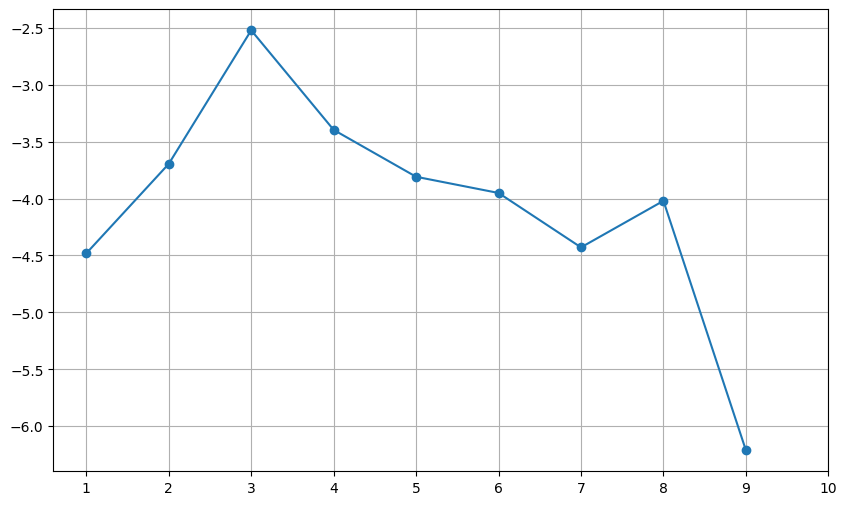

In [ ]:

k_values = range(1, 11)
gaps = []

for k in k_values:
    gap =gap_statistic(pca_df,n_clusters =k)
    gaps.append(gap)

plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, marker='o')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
gaps

[-4.481034090997161,
 -3.695132935357244,
 -2.522065280177256,
 -3.3969668352373983,
 -3.8086843796323735,
 -3.9510531103623063,
 -4.42889597408352,
 -4.020095869077466,
 -6.210952416113587,
 -inf]

Dilihat dari diagram gap statistic, jumlah kluster optimal adalah 3 (-2.52), yang ditunjukkan oleh pencapaian nilai maksimum pada angka 3, setelah itu nilai gap mulai turun. Ini mengindikasikan bahwa 3 adalah jumlah kluster yang paling efektif untuk pengelompokan data, memberikan pemisahan yang jelas antara kelompok tanpa menambah kompleksitas yang tidak perlu.



